In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
import pickle
import os
import seaborn as sns

In [2]:
def confidence(mean):
    mean = np.array(mean)
    interval = 1.96 * np.sqrt((mean * (1 - mean)) / 200)
    return interval

# stationary

In [99]:
# case2, 100 time steps, 1000 permutations
case2_100t_1000p = {'0': 0.03,'0.1': 0.13,'0.15': 0.31, '0.2': 0.41, '0.25': 0.59, '0.3': 0.74,'0.35': 0.89, '0.4': 0.95,  '0.45': 0.97, '0.5': 1.0, '0.6': 1.0, '0.7': 1.0, '0.8': 1.0, '0.9': 1.0}

In [100]:
# case2, 300 time steps, 1000 permutations
case2_300t_1000p = {'0':0.03,'0.05':0.11,'0.1': 0.36, '0.15':0.69, '0.2': 0.89, '0.3': 1.0, '0.4': 1.0, '0.5': 1.0, '0.6': 1.0, '0.7': 1.0, '0.8': 1.0, '0.9': 1.0}

In [101]:
# case2, 600 time steps, 1000 permutations
case2_600t_1000p = {'0.01': 0.12,'0.02': 0.11, '0.03': 0.13, '0.04': 0.08,'0.05': 0.17, '0.06': 0.23, '0.07': 0.32, '0.08': 0.38,'0.09': 0.5, '0.1': 0.61, '0.15':0.89, '0.2': 1.0, '0.3': 1.0,  '0.4': 1.0, '0.5': 1.0,  '0.6': 1.0, '0.7': 1.0,  '0.8': 1.0, '0.9': 1.0}

In [102]:
# case2, 900 time steps, 1000 permutations
case2_900t_1000p = {'0.01': 0.04, '0.02': 0.05, '0.03': 0.11,'0.04': 0.14, '0.05': 0.25, '0.06': 0.26, '0.07': 0.41,'0.08': 0.64, '0.09': 0.69,  '0.1': 0.86, '0.15':0.99, '0.2': 1.0, '0.3': 1.0, '0.4': 1.0, '0.5': 1.0, '0.6': 1.0, '0.7': 1.0, '0.8': 1.0, '0.9': 1.0}

In [103]:
# case2, 1200 time steps, 1000 permutations
case2_1200t_1000p = { '0.01': 0.07,'0.02': 0.12,'0.03': 0.14, '0.04': 0.26,'0.05': 0.34, '0.06': 0.43, '0.07': 0.74,'0.08': 0.72,'0.09': 0.84, '0.1': 0.96, '0.15':0.99,  '0.2': 1.0, '0.3': 1.0, '0.4': 1.0, '0.5': 1.0, '0.6': 1.0, '0.7': 1.0, '0.8': 1.0, '0.9': 1.0}

In [104]:
y1 = list(case2_100t_1000p.values())
x1 = [float(x.strip(' "')) for x in list(case2_100t_1000p.keys())]

y2 = list(case2_300t_1000p.values())
x2 = [float(x.strip(' "')) for x in list(case2_300t_1000p.keys())]

y3 = list(case2_600t_1000p.values())
x3 = [float(x.strip(' "')) for x in list(case2_600t_1000p.keys())]

y4 = list(case2_900t_1000p.values())
x4 = [float(x.strip(' "')) for x in list(case2_900t_1000p.keys())]

y5 = list(case2_1200t_1000p.values())
x5 = [float(x.strip(' "')) for x in list(case2_1200t_1000p.keys())]

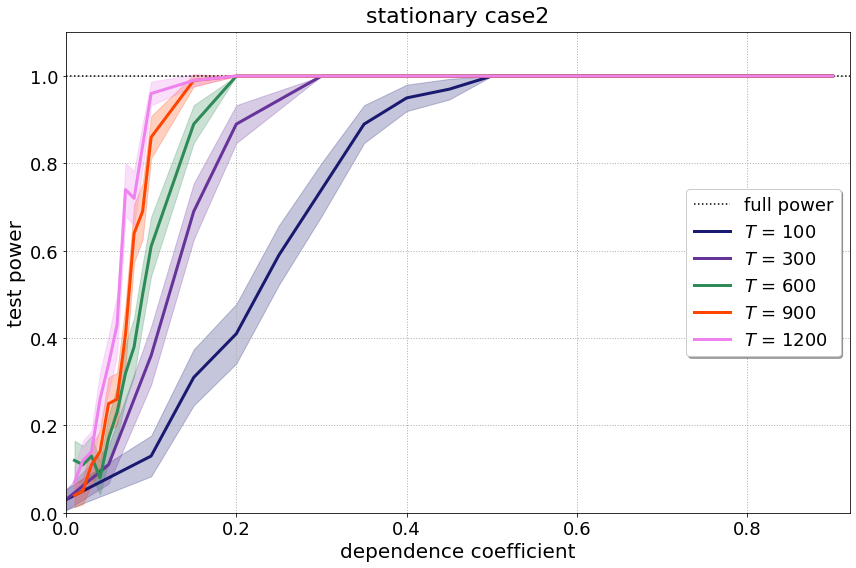

In [105]:
plt.figure(figsize=(12, 8))
plt.xlabel(r'dependence coefficient', size=20)
plt.ylabel(r'test power', size=20)
plt.ylim(0, 1.1)
plt.xlim(0.00, 0.92)
plt.hlines(y=1, xmin=0, xmax=1.1, colors='k', linestyles='dotted')

plt.title('stationary case2', size=22, pad=10)
plt.plot(x1, y1, 'midnightblue', lw=3) 
plt.plot(x2, y2, 'rebeccapurple', lw=3) 
plt.plot(x3, y3, 'seagreen', lw=3) 
plt.plot(x4, y4, 'orangered', lw=3) 
plt.plot(x5, y5, 'violet', lw=3)

# error bars
error_1 = confidence(y1)
error_2 = confidence(y2)
error_3 = confidence(y3)
error_4 = confidence(y4)
error_5 = confidence(y5)
plt.fill_between(x1, y1-error_1, y1+error_1, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x2, y2-error_2, y2+error_2, interpolate=True, alpha=0.25, color='rebeccapurple')
plt.fill_between(x3, y3-error_3, y3+error_3, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x4, y4-error_4, y4+error_4, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x5, y5-error_5, y5+error_5, interpolate=True, alpha=0.25, color='violet')

plt.legend(['full power','$T$ = 100', '$T$ = 300', '$T$ = 600', '$T$ = 900', '$T$ = 1200'], loc=7, fontsize=18, framealpha=1, shadow=True)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)
plt.tight_layout()

plt.savefig('svg/stat_2_time.svg', format='svg', dpi=300)
plt.show()

In [106]:
# case1, 100 time steps, 1000 permutations
case1_100t_1000p = {'0.1': 0.08, '0.2': 0.07, '0.3': 0.1, '0.4': 0.1, '0.5': 0.1, '0.6': 0.23, '0.7': 0.19, '0.8': 0.31, '0.9': 0.35}

In [107]:
# case1, 300 time steps, 1000 permutations
case1_300t_1000p = {'0.1': 0.04, '0.2': 0.12, '0.3': 0.17, '0.4': 0.25, '0.5': 0.36, '0.6': 0.68, '0.7': 0.7, '0.8': 0.89, '0.9': 0.93}

In [108]:
# case1, 600 time steps, 1000 permutations
case1_600t_1000p = {'0.1': 0.1, '0.2': 0.12, '0.3': 0.33, '0.4': 0.63, '0.5': 0.84, '0.6': 0.95,'0.7': 1.0, '0.8': 1.0, '0.9': 1.0}

In [109]:
# case1, 900 time steps, 1000 permutations
case1_900t_1000p = {'0.1': 0.07, '0.2': 0.22, '0.3': 0.51, '0.4': 0.88, '0.5': 0.98, '0.6': 1.0,'0.7': 1.0, '0.8': 1.0, '0.9': 1.0}

In [110]:
# case1, 1200 time steps, 1000 permutations
case1_1200t_1000p = {'0.1': 0.1, '0.2': 0.32, '0.3': 0.71, '0.4': 0.96, '0.5': 1.0, '0.6': 1.0, '0.7': 1.0, '0.8': 1.0, '0.9': 1.0}

In [111]:
y1 = list(case1_100t_1000p.values())
y2 = list(case1_300t_1000p.values())
y3 = list(case1_600t_1000p.values())
y4 = list(case1_900t_1000p.values())
y5 = list(case1_1200t_1000p.values())

In [112]:
x = np.arange(0.1, 1, 0.1)

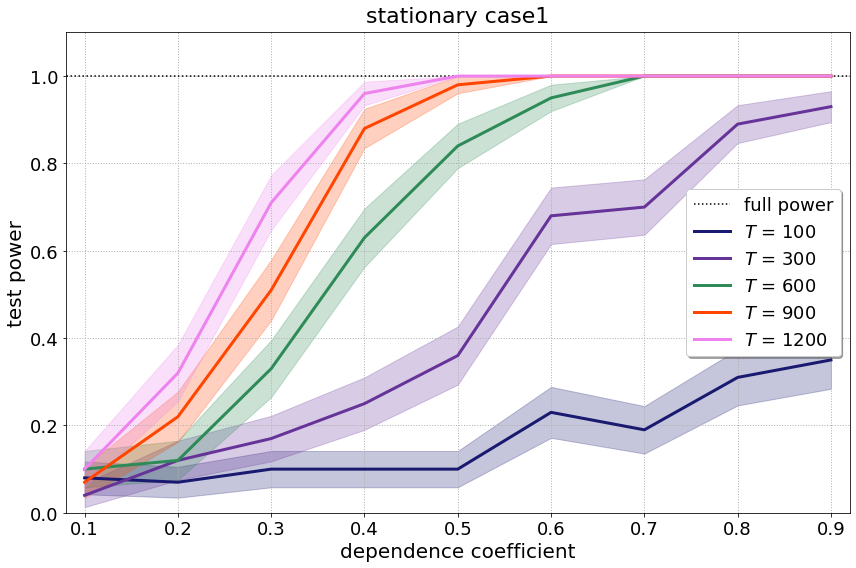

In [114]:
plt.figure(figsize=(12, 8))
plt.xlabel(r'dependence coefficient', size=20)
plt.ylabel(r'test power', size=20)
plt.ylim(0, 1.1)
plt.xlim(0.08, 0.92)
plt.hlines(y=1, xmin=0, xmax=1.1, colors='k', linestyles='dotted')

plt.title('stationary case1', size=22, pad=10)
plt.plot(x, y1, 'midnightblue', lw=3) 
plt.plot(x, y2, 'rebeccapurple', lw=3) 
plt.plot(x, y3, 'seagreen', lw=3) 
plt.plot(x, y4, 'orangered', lw=3) 
plt.plot(x, y5, 'violet', lw=3)

# error bars
error_1 = confidence(y1)
error_2 = confidence(y2)
error_3 = confidence(y3)
error_4 = confidence(y4)
error_5 = confidence(y5)
plt.fill_between(x, y1-error_1, y1+error_1, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x, y2-error_2, y2+error_2, interpolate=True, alpha=0.25, color='rebeccapurple')
plt.fill_between(x, y3-error_3, y3+error_3, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x, y4-error_4, y4+error_4, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x, y5-error_5, y5+error_5, interpolate=True, alpha=0.25, color='violet')

plt.legend(['full power', '$T$ = 100', '$T$ = 300', '$T$ = 600', '$T$ = 900', '$T$ = 1200'], loc=7, fontsize=18, framealpha=1, shadow=True)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)
plt.tight_layout()
plt.savefig('svg/stat_1_time.svg', format='svg', dpi=300)

plt.show()

In [9]:
# case3, 100 time steps, 1000 permutations
case3_100t_1000p = {'0.1': 0.04, '0.2': 0.04, '0.3': 0.08, '0.4': 0.05, '0.5': 0.07, '0.6': 0.06, '0.7': 0.04, '0.8': 0.08, '0.9': 0.07}

In [10]:
# case3, 300 time steps, 1000 permutations
case3_300t_1000p = {'0.1': 0.03, '0.2': 0.04, '0.3': 0.03, '0.4': 0.05, '0.5': 0.06, '0.6': 0.08, '0.7': 0.05, '0.8': 0.06, '0.9': 0.08}

In [11]:
# case3, 600 time steps, 1000 permutations
case3_600t_1000p = {'0.1': 0.05, '0.2': 0.02, '0.3': 0.05, '0.4': 0.07, '0.5': 0.05, '0.6': 0.02, '0.7': 0.06, '0.8': 0.06, '0.9': 0.07}

In [12]:
# case3, 900 time steps, 1000 permutations
case3_900t_1000p = {'0.1': 0.03, '0.2': 0.08, '0.3': 0.06, '0.4': 0.04, '0.5': 0.08, '0.6': 0.05, '0.7': 0.06, '0.8': 0.04, '0.9': 0.08}

In [13]:
# case3, 1200 time steps, 1000 permutations
case3_1200t_1000p = {'0.1': 0.07, '0.2': 0.06, '0.3': 0.05, '0.4': 0.06, '0.5': 0.05, '0.6': 0.02, '0.7': 0.09, '0.8': 0.07, '0.9': 0.05}

In [14]:
y1 = list(case3_100t_1000p.values())
y2 = list(case3_300t_1000p.values())
y3 = list(case3_600t_1000p.values())
y4 = list(case3_900t_1000p.values())
y5 = list(case3_1200t_1000p.values())

In [15]:
x = np.arange(0.1, 1, 0.1)

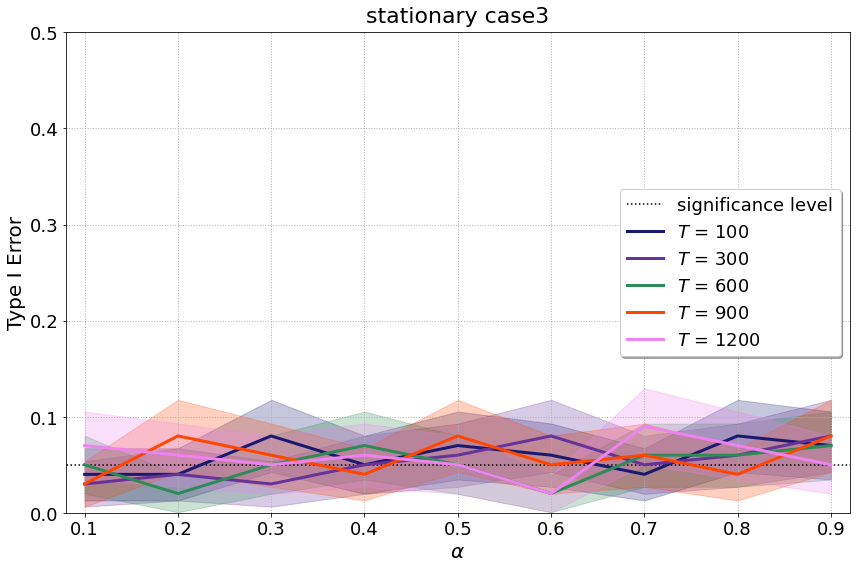

In [16]:
plt.figure(figsize=(12, 8))
plt.xlabel(r'$\alpha$', size=20)
plt.ylabel(r'Type I Error', size=20)
plt.ylim(0, 0.5)
plt.xlim(0.08, 0.92)
plt.hlines(y=0.05, xmin=0, xmax=1.1, colors='k', linestyles='dotted')

plt.title('stationary case3', size=22, pad=10)
plt.plot(x, y1, 'midnightblue', lw=3) 
plt.plot(x, y2, 'rebeccapurple', lw=3) 
plt.plot(x, y3, 'seagreen', lw=3) 
plt.plot(x, y4, 'orangered', lw=3) 
plt.plot(x, y5, 'violet', lw=3)

# error bars
error_1 = confidence(y1)
error_2 = confidence(y2)
error_3 = confidence(y3)
error_4 = confidence(y4)
error_5 = confidence(y5)
plt.fill_between(x, y1-error_1, y1+error_1, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x, y2-error_2, y2+error_2, interpolate=True, alpha=0.25, color='rebeccapurple')
plt.fill_between(x, y3-error_3, y3+error_3, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x, y4-error_4, y4+error_4, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x, y5-error_5, y5+error_5, interpolate=True, alpha=0.25, color='violet')

plt.legend(['significance level', '$T$ = 100', '$T$ = 300', '$T$ = 600', '$T$ = 900', '$T$ = 1200'], loc=7, fontsize=18, framealpha=1, shadow=True)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)
plt.tight_layout()
plt.savefig('svg/stat_3_time.svg', format='svg', dpi=300)

plt.show()

In [123]:
# case2, 100 time steps, 50 permutations
case2_100t_50p = {'0.1': 0.03, '0.2': 0.23, '0.3': 0.53, '0.4': 0.83, '0.5': 0.93, '0.6': 0.98, '0.7': 0.98, '0.8': 0.98, '0.9': 1.0}

In [124]:
# case2, 100 time steps, 100 permutations
case2_100t_100p = {'0.1': 0.16, '0.2': 0.32, '0.3': 0.67, '0.4': 0.91, '0.5': 0.99, '0.6': 0.99, '0.7': 1.0, '0.8': 1.0, '0.9': 1.0}

In [125]:
# case2, 100 time steps, 200 permutations
case2_100t_200p = {'0.1': 0.13, '0.2': 0.38, '0.3': 0.71, '0.4': 0.93, '0.5': 1.0, '0.6': 1.0, '0.7': 1.0, '0.8': 1.0,'0.9': 1.0}

In [126]:
# case2, 100 time steps, 500 permutations
case2_100t_500p = {'0.1': 0.13, '0.2': 0.3, '0.3': 0.73, '0.4': 0.93, '0.5': 0.98, '0.6': 1.0, '0.7': 1.0, '0.8': 1.0, '0.9': 1.0}

In [127]:
# case2, 100 time steps, 4000 permutations
case2_100t_4000p = {'0.1': 0.08, '0.2': 0.45, '0.3': 0.59, '0.4': 0.93,  '0.5': 0.95, '0.6': 1.0,'0.7': 1.0, '0.8': 1.0, '0.9': 1.0}

In [128]:
# case2, 100 time steps, 3000 permutations
case2_100t_3000p = {'0.1': 0.11, '0.2': 0.31, '0.3': 0.7, '0.4': 0.96, '0.5': 1.0, '0.6': 1.0, '0.7': 1.0, '0.8': 1.0, '0.9': 1.0}

In [129]:
# case2, 100 time steps, 2000 permutations
case2_100t_2000p = {'0.1': 0.13, '0.2': 0.4, '0.3': 0.62, '0.4': 0.94, '0.5': 0.99, '0.6': 0.99, '0.7': 1.0, '0.8': 1.0, '0.9': 1.0}

In [130]:
# case2, 100 time steps, 1000 permutations
case2_100t_1000p = {'0.1': 0.13, '0.2': 0.41, '0.3': 0.74, '0.4': 0.95,'0.5': 1.0, '0.6': 1.0, '0.7': 1.0, '0.8': 1.0, '0.9': 1.0}

In [131]:
y1 = list(case2_100t_50p.values())
y2 = list(case2_100t_100p.values())
y3 = list(case2_100t_200p.values())
y4 = list(case2_100t_500p.values())
y5 = list(case2_100t_1000p.values())
y6 = list(case2_100t_2000p.values())
y7 = list(case2_100t_3000p.values())
y8 = list(case2_100t_4000p.values())

In [132]:
x = np.arange(0.1, 1, 0.1)

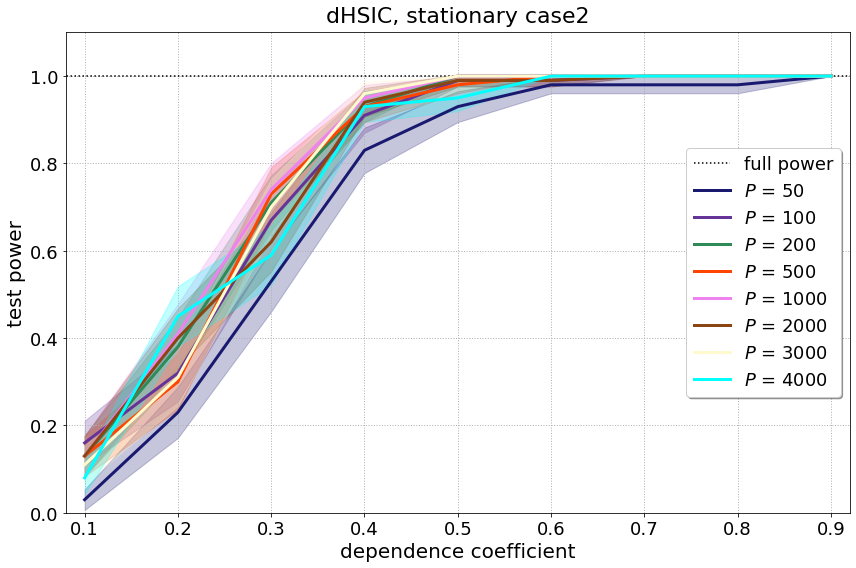

In [133]:
plt.figure(figsize=(12, 8))
plt.xlabel(r'dependence coefficient', size=20)
plt.ylabel(r'test power', size=20)
plt.ylim(0, 1.1)
plt.xlim(0.08, 0.92)
plt.hlines(y=1, xmin=0, xmax=1.1, colors='k', linestyles='dotted')

plt.title('dHSIC, stationary case2', size=22, pad=10)
plt.plot(x, y1, 'midnightblue', lw=3) 
plt.plot(x, y2, 'rebeccapurple', lw=3) 
plt.plot(x, y3, 'seagreen', lw=3) 
plt.plot(x, y4, 'orangered', lw=3) 
plt.plot(x, y5, 'violet', lw=3)
plt.plot(x, y6, 'saddlebrown', lw=3) 
plt.plot(x, y7, 'lemonchiffon', lw=3) 
plt.plot(x, y8, 'aqua', lw=3)
# error bars
error_1 = confidence(y1)
error_2 = confidence(y2)
error_3 = confidence(y3)
error_4 = confidence(y4)
error_5 = confidence(y5)
error_6 = confidence(y6)
error_7 = confidence(y7)
error_8 = confidence(y8)
plt.fill_between(x, y1-error_1, y1+error_1, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x, y2-error_2, y2+error_2, interpolate=True, alpha=0.25, color='rebeccapurple')
plt.fill_between(x, y3-error_3, y3+error_3, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x, y4-error_4, y4+error_4, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x, y5-error_5, y5+error_5, interpolate=True, alpha=0.25, color='violet')
plt.fill_between(x, y6-error_6, y6+error_6, interpolate=True, alpha=0.25, color='saddlebrown')
plt.fill_between(x, y7-error_7, y7+error_7, interpolate=True, alpha=0.25, color='lemonchiffon')
plt.fill_between(x, y8-error_8, y8+error_8, interpolate=True, alpha=0.25, color='aqua')

plt.legend(['full power', '$P$ = 50', '$P$ = 100', '$P$ = 200', '$P$ = 500', '$P$ = 1000', '$P$ = 2000','$P$ = 3000', '$P$ = 4000'], loc=7, fontsize=18, framealpha=1, shadow=True)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)
plt.tight_layout()
plt.savefig('svg/stat_2_perm.svg', format='svg', dpi=300)

plt.show()

# nonstats

## case2

In [134]:
case2_300n_1t_1000p = {'0': 0.01,'0.1': 0.07, '0.2': 0.03, '0.3': 0.04, '0.4': 0.05, '0.5': 0.03, '0.6': 0.08, '0.7': 0.04, '0.8': 0.06, '0.9': 0.03}

In [135]:
case2_300n_3t_1000p = {'0.01': 0.02, '0.02': 0.05, '0.03': 0.04, '0.04': 0.14, '0.05': 0.15, '0.06': 0.14, '0.07': 0.15, '0.08': 0.24, '0.09': 0.45,'0.1': 0.41, '0.2': 0.97, '0.3': 1.0, '0.4': 1, '0.5': 1, '0.6': 1, '0.7': 1, '0.8': 1, '0.9': 1}

In [136]:
case2_300n_5t_1000p = {'0.01': 0.05, '0.02': 0.08, '0.03': 0.12, '0.04': 0.07, '0.05': 0.15, '0.06': 0.2, '0.07': 0.16, '0.08': 0.38, '0.09': 0.53,'0.1': 0.59, '0.2': 1.0, '0.3': 1, '0.4': 1, '0.5': 1, '0.6': 1, '0.7': 1, '0.8': 1, '0.9': 1}

In [137]:
case2_300n_10t_1000p = {'0.01': 0.02, '0.02': 0.12, '0.03': 0.1, '0.04': 0.16, '0.05': 0.18, '0.06': 0.36, '0.07': 0.47, '0.08': 0.65, '0.09': 0.71,'0.1': 0.88, '0.2': 1.0}

In [138]:
case2_300n_20t_1000p = {'0.01': 0.07, '0.02': 0.05, '0.03': 0.12, '0.04': 0.21, '0.05': 0.33, '0.06': 0.54, '0.07': 0.7, '0.08': 0.8, '0.09': 0.9, '0.1': 0.98, '0.2': 1.0, '0.3': 1, '0.4': 1, '0.5': 1, '0.6': 1, '0.7': 1, '0.8': 1, '0.9': 1}

In [139]:
y1 = list(case2_300n_1t_1000p.values())
x1 = [float(x.strip(' "')) for x in list(case2_300n_1t_1000p.keys())]

y2 = list(case2_300n_3t_1000p.values())
x2 = [float(x.strip(' "')) for x in list(case2_300n_3t_1000p.keys())]

y3 = list(case2_300n_5t_1000p.values())
x3 = [float(x.strip(' "')) for x in list(case2_300n_5t_1000p.keys())]

y4 = list(case2_300n_10t_1000p.values())
x4 = [float(x.strip(' "')) for x in list(case2_300n_10t_1000p.keys())]

y5 = list(case2_300n_20t_1000p.values())
x5 = [float(x.strip(' "')) for x in list(case2_300n_20t_1000p.keys())]

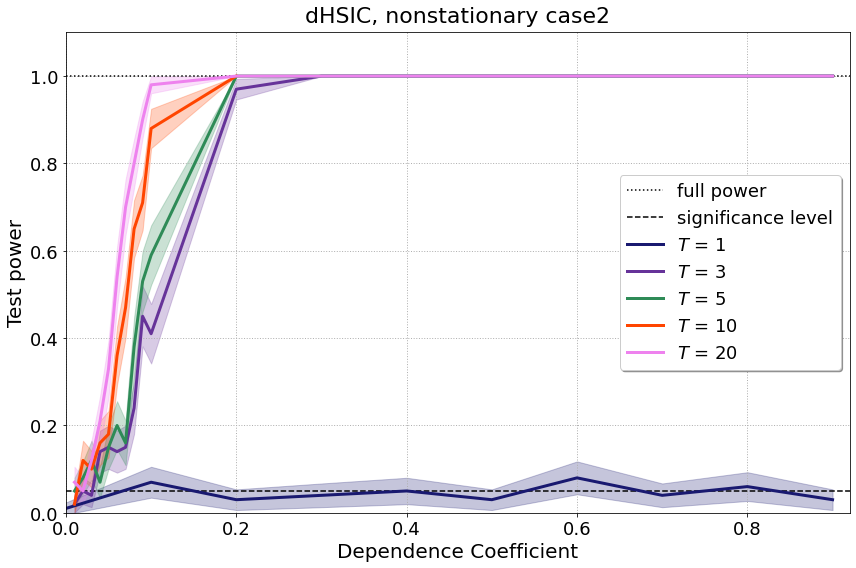

In [102]:
plt.figure(figsize=(12, 8))
plt.xlabel(r'Dependence Coefficient', size=20)
plt.ylabel(r'Test power', size=20)
plt.ylim(0, 1.1)
plt.xlim(0.0, 0.92)
plt.hlines(y=1, xmin=0, xmax=1.1, colors='k', linestyles='dotted')
plt.hlines(y=0.05, xmin=0, xmax=1.1, colors='k', linestyles='dashed')

plt.title('dHSIC, nonstationary case2', size=22, pad=10)
plt.plot(x1, y1, 'midnightblue', lw=3) 
plt.plot(x2, y2, 'rebeccapurple', lw=3) 
plt.plot(x3, y3, 'seagreen', lw=3) 
plt.plot(x4, y4, 'orangered', lw=3) 
plt.plot(x5, y5, 'violet', lw=3)

# error bars
error_1 = confidence(y1)
error_2 = confidence(y2)
error_3 = confidence(y3)
error_4 = confidence(y4)
error_5 = confidence(y5)

plt.fill_between(x1, y1-error_1, y1+error_1, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x2, y2-error_2, y2+error_2, interpolate=True, alpha=0.25, color='rebeccapurple')
plt.fill_between(x3, y3-error_3, y3+error_3, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x4, y4-error_4, y4+error_4, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x5, y5-error_5, y5+error_5, interpolate=True, alpha=0.25, color='violet')

plt.legend(['full power','significance level', '$T$ = 1', '$T$ = 3', '$T$ = 5', '$T$ = 10', '$T$ = 20'], loc=7, fontsize=18, framealpha=1, shadow=True)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)
plt.tight_layout()

plt.show()

In [103]:
#nonstat case1 changing the number of realisation

In [104]:
case1_500n_10t_100p = {'0.01': 0.08, '0.02': 0.19, '0.03': 0.72, '0.04': 0.98, '0.05': 1.0, '0.06': 1.0, '0.07': 1.0, '0.08': 1.0, '0.09': 1.0}
case1_400n_10t_100p = {'0.01': 0.11, '0.02': 0.1, '0.03': 0.47, '0.04': 0.86, '0.05': 0.99, '0.06': 1.0, '0.07': 1.0, '0.08': 1.0, '0.09': 1.0}
case1_300n_10t_100p = {'0.01': 0.06, '0.02': 0.19, '0.03': 0.34, '0.04': 0.57, '0.05': 0.95, '0.06': 0.98, '0.07': 1.0, '0.08': 1.0, '0.09': 1.0}
case1_200n_10t_100p = {'0.01': 0.08, '0.02': 0.1, '0.03': 0.19, '0.04': 0.38, '0.05': 0.64, '0.06': 0.81, '0.07': 0.85, '0.08': 0.96, '0.09': 0.98, '0.1': 1}
case1_100n_10t_100p = {'0.01': 0.06, '0.02': 0.05, '0.03': 0.04, '0.04': 0.11, '0.05': 0.23, '0.06': 0.34, '0.07': 0.46, '0.08': 0.44, '0.09': 0.5, '0.1': 0.58, '0.2': 0.74, '0.3': 0.8, '0.4': 0.86, '0.5': 1}

In [105]:
y1 = list(case1_100n_10t_100p.values())
x1 = [float(x.strip(' "')) for x in list(case1_100n_10t_100p.keys())]

y2 = list(case1_200n_10t_100p.values())
x2 = [float(x.strip(' "')) for x in list(case1_200n_10t_100p.keys())]

y3 = list(case1_300n_10t_100p.values())
x3 = [float(x.strip(' "')) for x in list(case1_300n_10t_100p.keys())]

y4 = list(case1_400n_10t_100p.values())
x4 = [float(x.strip(' "')) for x in list(case1_400n_10t_100p.keys())]

y5 = list(case1_500n_10t_100p.values())
x5 = [float(x.strip(' "')) for x in list(case1_500n_10t_100p.keys())]

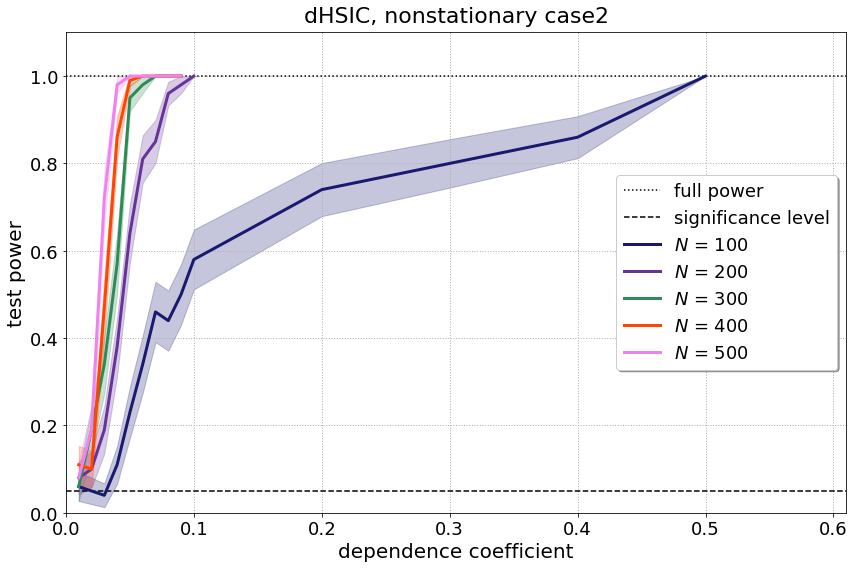

In [106]:
plt.figure(figsize=(12, 8))
plt.xlabel(r'dependence coefficient', size=20)
plt.ylabel(r'test power', size=20)
plt.ylim(0, 1.1)
plt.xlim(0.0, 0.61)
plt.hlines(y=1, xmin=0, xmax=1.1, colors='k', linestyles='dotted')
plt.hlines(y=0.05, xmin=0, xmax=1.1, colors='k', linestyles='dashed')

plt.title('dHSIC, nonstationary case2', size=22, pad=10)
plt.plot(x1, y1, 'midnightblue', lw=3) 
plt.plot(x2, y2, 'rebeccapurple', lw=3) 
plt.plot(x3, y3, 'seagreen', lw=3) 
plt.plot(x4, y4, 'orangered', lw=3) 
plt.plot(x5, y5, 'violet', lw=3)

# error bars
error_1 = confidence(y1)
error_2 = confidence(y2)
error_3 = confidence(y3)
error_4 = confidence(y4)
error_5 = confidence(y5)

plt.fill_between(x1, y1-error_1, y1+error_1, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x2, y2-error_2, y2+error_2, interpolate=True, alpha=0.25, color='rebeccapurple')
plt.fill_between(x3, y3-error_3, y3+error_3, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x4, y4-error_4, y4+error_4, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x5, y5-error_5, y5+error_5, interpolate=True, alpha=0.25, color='violet')

plt.legend(['full power','significance level', '$N$ = 100', '$N$ = 200', '$N$ = 300', '$N$ = 400', '$N$ = 500'], loc=7, fontsize=18, framealpha=1, shadow=True)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)
plt.tight_layout()

plt.show()

In [1]:
# nonstationary linear trend

In [141]:
# case2_linear_500n_20t_1000p = {'0.01': 0.08, '0.02': 0.14, '0.03': 0.24, '0.04': 0.45, '0.05': 0.66, '0.06': 0.88, '0.07': 0.99, '0.08': 1.0, '0.09': 1.0}
# case2_linear_400n_20t_1000p = {'0.01': 0.06, '0.02': 0.09, '0.03': 0.18, '0.04': 0.31, '0.05': 0.68, '0.06': 0.79, '0.07': 0.95, '0.08': 0.98, '0.09': 1.0}
# case2_linear_300n_20t_1000p = {'0.01': 0.06, '0.02': 0.11, '0.03': 0.19, '0.04': 0.23, '0.05': 0.42, '0.06': 0.61, '0.07': 0.87, '0.08': 0.9, '0.09': 0.98, '0.1': 1}
# case2_linear_200n_20t_1000p = {'0.01': 0.02, '0.02': 0.06, '0.03': 0.05, '0.04': 0.17, '0.05': 0.28, '0.06': 0.43, '0.07': 0.59, '0.08': 0.74, '0.09': 0.84,'0.1': 0.94, '0.11': 0.96, '0.12': 1}
case2_linear_100n_20t_1000p = {'0.01': 0.09, '0.02': 0.06, '0.03': 0.06, '0.04': 0.06, '0.05': 0.07, '0.06': 0.23, '0.07': 0.27, '0.08': 0.35, '0.09': 0.4, '0.1': 0.62, '0.11': 0.63, '0.12': 0.78, '0.13': 0.88, '0.14': 0.93, '0.15': 0.96, '0.16': 0.98, '0.17': 1}
case2_linear_50n_20t_1000p = {'0.01': 0.04, '0.04': 0.11, '0.07': 0.1, '0.1': 0.3, '0.13': 0.43, '0.16': 0.67, '0.19': 0.9, '0.22': 0.96, '0.25': 0.98, '0.28': 1}
case2_linear_40n_20t_1000p = {'0.01': 0.04, '0.04': 0.04, '0.07': 0.11, '0.10': 0.16, '0.13': 0.24, '0.16': 0.53, '0.19': 0.68, '0.22': 0.86, '0.25': 0.96, '0.28': 0.95, '0.31': 1}
case2_linear_30n_20t_1000p = {'0.01': 0.07, '0.05': 0.06, '0.09': 0.08, '0.13': 0.23, '0.17': 0.36, '0.21': 0.63, '0.25': 0.82, '0.29': 0.94, '0.33': 0.95, '0.37': 1.0}
case2_linear_20n_20t_1000p = {'0.01': 0.04, '0.06': 0.08, '0.11': 0.09, '0.16': 0.26, '0.21': 0.39, '0.26': 0.47, '0.31': 0.7, '0.364': 0.82, '0.41': 0.93, '0.46': 0.96, '0.51': 1}

In [142]:
y1 = list(case2_linear_20n_20t_1000p.values())
x1 = [float(x.strip(' "')) for x in list(case2_linear_20n_20t_1000p.keys())]

y2 = list(case2_linear_30n_20t_1000p.values())
x2 = [float(x.strip(' "')) for x in list(case2_linear_30n_20t_1000p.keys())]

y3 = list(case2_linear_40n_20t_1000p.values())
x3 = [float(x.strip(' "')) for x in list(case2_linear_40n_20t_1000p.keys())]
      
y4 = list(case2_linear_50n_20t_1000p.values())
x4 = [float(x.strip(' "')) for x in list(case2_linear_50n_20t_1000p.keys())]

y5 = list(case2_linear_100n_20t_1000p.values())
x5 = [float(x.strip(' "')) for x in list(case2_linear_100n_20t_1000p.keys())]

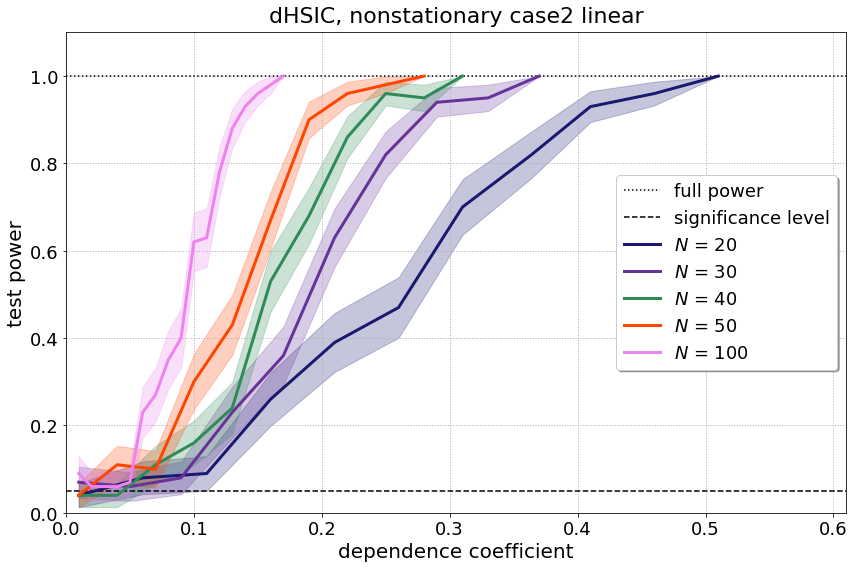

In [143]:
plt.figure(figsize=(12, 8))
plt.xlabel(r'dependence coefficient', size=20)
plt.ylabel(r'test power', size=20)
plt.ylim(0, 1.1)
plt.xlim(0.0, 0.61)
plt.hlines(y=1, xmin=0, xmax=1.1, colors='k', linestyles='dotted')
plt.hlines(y=0.05, xmin=0, xmax=1.1, colors='k', linestyles='dashed')

plt.title('dHSIC, nonstationary case2 linear', size=22, pad=10)
plt.plot(x1, y1, 'midnightblue', lw=3) 
plt.plot(x2, y2, 'rebeccapurple', lw=3) 
plt.plot(x3, y3, 'seagreen', lw=3) 
plt.plot(x4, y4, 'orangered', lw=3) 
plt.plot(x5, y5, 'violet', lw=3)

# error bars
error_1 = confidence(y1)
error_2 = confidence(y2)
error_3 = confidence(y3)
error_4 = confidence(y4)
error_5 = confidence(y5)

plt.fill_between(x1, y1-error_1, y1+error_1, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x2, y2-error_2, y2+error_2, interpolate=True, alpha=0.25, color='rebeccapurple')
plt.fill_between(x3, y3-error_3, y3+error_3, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x4, y4-error_4, y4+error_4, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x5, y5-error_5, y5+error_5, interpolate=True, alpha=0.25, color='violet')

plt.legend(['full power','significance level', '$N$ = 20', '$N$ = 30', '$N$ = 40', '$N$ = 50', '$N$ = 100'], loc=7, fontsize=18, framealpha=1, shadow=True)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)
plt.tight_layout()
plt.savefig('svg/nonstat_2_lin_num.svg', format='svg', dpi=300)

plt.show()

In [144]:
case2_linear_50n_20t_1000p = {'0.01': 0.04, '0.04': 0.11, '0.07': 0.1, '0.1': 0.3, '0.13': 0.43, '0.16': 0.67, '0.19': 0.9, '0.22': 0.96, '0.25': 0.98, '0.28': 1}
case2_linear_50n_10t_1000p = {'0.01': 0.05, '0.03': 0.03, '0.05': 0.07, '0.07': 0.13, '0.09': 0.15, '0.11': 0.23, '0.13': 0.36, '0.15': 0.53, '0.17': 0.55, '0.19': 0.72, '0.21': 0.87, '0.23': 0.88, '0.25': 0.94, '0.27': 0.95, '0.29': 0.98, '0.31': 1}
case2_linear_50n_5t_1000p = {'0.01': 0.08, '0.03': 0.03, '0.05': 0.08, '0.07': 0.12, '0.09': 0.14, '0.11': 0.18, '0.13': 0.2, '0.15': 0.28, '0.17': 0.37, '0.19': 0.59, '0.21': 0.51, '0.23': 0.72, '0.25': 0.77, '0.27': 0.78, '0.29': 0.91, '0.29': 0.9, '0.31': 0.87, '0.33': 0.94, '0.35': 0.94, '0.37': 0.99, '0.39': 0.99, '0.41': 0.99, '0.43': 1.0}
case2_linear_50n_3t_1000p ={'0.01': 0.04, '0.04': 0.06, '0.07': 0.06, '0.1': 0.05, '0.13': 0.15, '0.16': 0.23, '0.19': 0.19, '0.22': 0.32, '0.25': 0.47, '0.28': 0.59, '0.31': 0.58, '0.34': 0.77, '0.37': 0.82, '0.4': 0.88, '0.43': 0.94, '0.46': 0.97, '0.49': 0.96, '0.52': 0.97, '0.55': 1.0}
case2_linear_50n_1t_1000p = {'0.01': 0.04, '0.11': 0.06, '0.21': 0.09, '0.31': 0.07, '0.41': 0.06, '0.51': 0.08, '0.611': 0.06, '0.71': 0.06, '0.81': 0.04, '0.91': 0.03}

In [145]:
y5 = list(case2_linear_50n_20t_1000p.values())
x5 = [float(x.strip(' "')) for x in list(case2_linear_50n_20t_1000p.keys())]

y4 = list(case2_linear_50n_10t_1000p.values())
x4 = [float(x.strip(' "')) for x in list(case2_linear_50n_10t_1000p.keys())]

y3 = list(case2_linear_50n_5t_1000p.values())
x3 = [float(x.strip(' "')) for x in list(case2_linear_50n_5t_1000p.keys())]
      
y2 = list(case2_linear_50n_3t_1000p.values())
x2 = [float(x.strip(' "')) for x in list(case2_linear_50n_3t_1000p.keys())]

y1 = list(case2_linear_50n_1t_1000p.values())
x1 = [float(x.strip(' "')) for x in list(case2_linear_50n_1t_1000p.keys())]

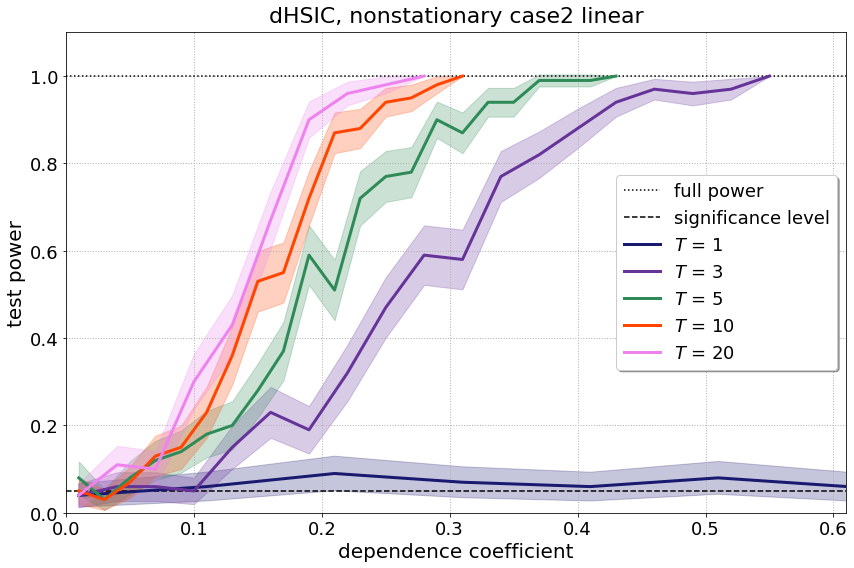

In [147]:
plt.figure(figsize=(12, 8))
plt.xlabel(r'dependence coefficient', size=20)
plt.ylabel(r'test power', size=20)
plt.ylim(0, 1.1)
plt.xlim(0.0, 0.61)
plt.hlines(y=1, xmin=0, xmax=1.1, colors='k', linestyles='dotted')
plt.hlines(y=0.05, xmin=0, xmax=1.1, colors='k', linestyles='dashed')

plt.title('dHSIC, nonstationary case2 linear', size=22, pad=10)
plt.plot(x1, y1, 'midnightblue', lw=3) 
plt.plot(x2, y2, 'rebeccapurple', lw=3) 
plt.plot(x3, y3, 'seagreen', lw=3) 
plt.plot(x4, y4, 'orangered', lw=3) 
plt.plot(x5, y5, 'violet', lw=3)

# error bars
error_1 = confidence(y1)
error_2 = confidence(y2)
error_3 = confidence(y3)
error_4 = confidence(y4)
error_5 = confidence(y5)

plt.fill_between(x1, y1-error_1, y1+error_1, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x2, y2-error_2, y2+error_2, interpolate=True, alpha=0.25, color='rebeccapurple')
plt.fill_between(x3, y3-error_3, y3+error_3, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x4, y4-error_4, y4+error_4, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x5, y5-error_5, y5+error_5, interpolate=True, alpha=0.25, color='violet')

plt.legend(['full power','significance level', '$T$ = 1', '$T$ = 3', '$T$ = 5', '$T$ = 10', '$T$ = 20'], loc=7, fontsize=18, framealpha=1, shadow=True)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)
plt.tight_layout()
plt.savefig('svg/nonstat_2_lin_time.svg', format='svg', dpi=300)

plt.show()

In [148]:
case2_nonlin_100n_20t_1000p = {'0.01': 0.04, '0.02': 0.07, '0.03': 0.1, '0.04': 0.08, '0.05': 0.13, '0.06': 0.19, '0.07': 0.26, '0.08': 0.42, '0.09': 0.44, '0.1': 0.55, '0.11': 0.62, '0.12': 0.75, '0.13': 0.79, '0.14': 0.87, '0.15': 0.94, '0.16': 0.96, '0.17': 0.99, '0.18': 1.0, '0.19': 1.0}
case2_nonlin_50n_20t_1000p = {'0.01': 0.03, '0.02': 0.09, '0.03': 0.03, '0.04': 0.05, '0.05': 0.1, '0.06': 0.05, '0.07': 0.09, '0.08': 0.14, '0.09': 0.27, '0.10': 0.22, '0.11': 0.27, '0.12': 0.3, '0.13': 0.4, '0.14': 0.54, '0.15': 0.61, '0.16': 0.69, '0.17': 0.74, '0.18': 0.84, '0.19': 0.89, '0.2': 0.89, '0.21': 0.89, '0.22': 0.94, '0.23': 1}
case2_nonlin_40n_20t_1000p = {'0.01': 0.03, '0.03': 0.04, '0.05': 0.11, '0.07': 0.13, '0.09': 0.17, '0.11': 0.29, '0.13': 0.36, '0.15': 0.49, '0.17': 0.47, '0.19': 0.71, '0.21': 0.85, '0.23': 0.89, '0.25': 0.96, '0.27': 0.97, '0.29': 0.99, '0.31': 1.0}
case2_nonlin_30n_20t_1000p = {'0.01': 0.09, '0.04': 0.07, '0.07': 0.04, '0.1': 0.13, '0.13': 0.23, '0.16': 0.38, '0.19': 0.46, '0.22': 0.64, '0.25': 0.76, '0.28': 0.91, '0.31': 0.95, '0.34': 0.98, '0.37': 0.97, '0.4': 0.99, '0.43': 1.0}
case2_nonlin_20n_20t_1000p = {'0.01': 0.03, '0.04': 0.03, '0.07': 0.12, '0.1': 0.13, '0.13': 0.15, '0.16': 0.25, '0.19': 0.23, '0.22': 0.44, '0.25': 0.5, '0.28': 0.65, '0.31': 0.79, '0.34': 0.84, '0.37': 0.82, '0.4': 0.9, '0.43': 0.93, '0.46': 0.96, '0.49': 1.0}

In [149]:
y1 = list(case2_nonlin_20n_20t_1000p.values())
x1 = [float(x.strip(' "')) for x in list(case2_nonlin_20n_20t_1000p.keys())]

y2 = list(case2_nonlin_30n_20t_1000p.values())
x2 = [float(x.strip(' "')) for x in list(case2_nonlin_30n_20t_1000p.keys())]

y3 = list(case2_nonlin_40n_20t_1000p.values())
x3 = [float(x.strip(' "')) for x in list(case2_nonlin_40n_20t_1000p.keys())]
      
y4 = list(case2_nonlin_50n_20t_1000p.values())
x4 = [float(x.strip(' "')) for x in list(case2_nonlin_50n_20t_1000p.keys())]

y5 = list(case2_nonlin_100n_20t_1000p.values())
x5 = [float(x.strip(' "')) for x in list(case2_nonlin_100n_20t_1000p.keys())]

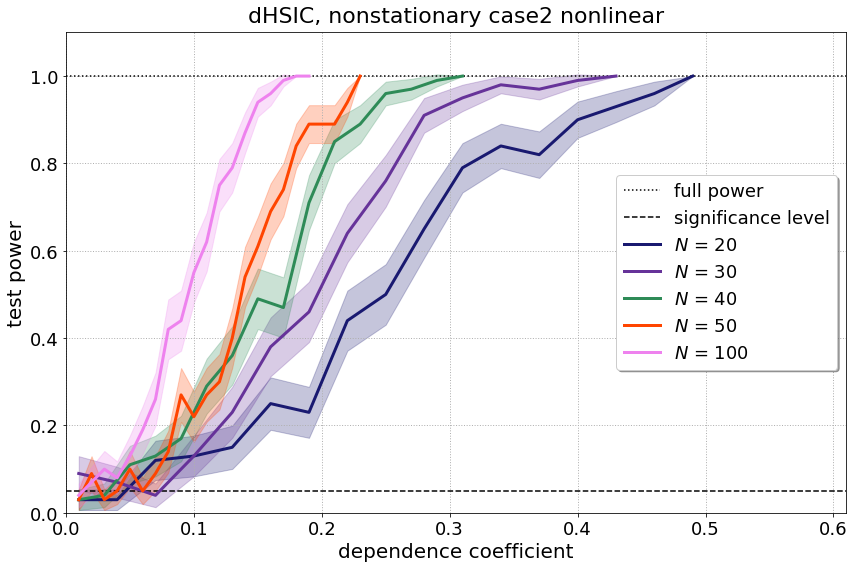

In [32]:
plt.figure(figsize=(12, 8))
plt.xlabel(r'dependence coefficient', size=20)
plt.ylabel(r'test power', size=20)
plt.ylim(0, 1.1)
plt.xlim(0.0, 0.61)
plt.hlines(y=1, xmin=0, xmax=1.1, colors='k', linestyles='dotted')
plt.hlines(y=0.05, xmin=0, xmax=1.1, colors='k', linestyles='dashed')

plt.title('dHSIC, nonstationary case2 nonlinear', size=22, pad=10)
plt.plot(x1, y1, 'midnightblue', lw=3) 
plt.plot(x2, y2, 'rebeccapurple', lw=3) 
plt.plot(x3, y3, 'seagreen', lw=3) 
plt.plot(x4, y4, 'orangered', lw=3) 
plt.plot(x5, y5, 'violet', lw=3)

# error bars
error_1 = confidence(y1)
error_2 = confidence(y2)
error_3 = confidence(y3)
error_4 = confidence(y4)
error_5 = confidence(y5)

plt.fill_between(x1, y1-error_1, y1+error_1, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x2, y2-error_2, y2+error_2, interpolate=True, alpha=0.25, color='rebeccapurple')
plt.fill_between(x3, y3-error_3, y3+error_3, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x4, y4-error_4, y4+error_4, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x5, y5-error_5, y5+error_5, interpolate=True, alpha=0.25, color='violet')

plt.legend(['full power','significance level', '$N$ = 20', '$N$ = 30', '$N$ = 40', '$N$ = 50', '$N$ = 100'], loc=7, fontsize=18, framealpha=1, shadow=True)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)
plt.tight_layout()


plt.show()

In [4]:
case2_nonlin_50n_20t_1000p = {'0.01': 0.03, '0.02': 0.09, '0.03': 0.03, '0.04': 0.05, '0.05': 0.1, '0.06': 0.05, '0.07': 0.09, '0.08': 0.14, '0.09': 0.27, '0.10': 0.22, '0.11': 0.27, '0.12': 0.3, '0.13': 0.4, '0.14': 0.54, '0.15': 0.61, '0.16': 0.69, '0.17': 0.74, '0.18': 0.84, '0.19': 0.89, '0.2': 0.89, '0.21': 0.89, '0.22': 0.94, '0.23': 1}
case2_nonlin_50n_10t_1000p = {'0.01': 0.07, '0.03': 0.02, '0.05': 0.05, '0.07': 0.12, '0.09': 0.18, '0.11': 0.16, '0.13': 0.38, '0.15': 0.45, '0.17': 0.48, '0.19': 0.68, '0.21': 0.81, '0.23': 0.85, '0.25': 0.94, '0.27': 0.97, '0.29': 0.99, '0.31': 1}
case2_nonlin_50n_5t_1000p = {'0.01': 0.05, '0.04': 0.05, '0.07': 0.13, '0.1': 0.13, '0.13': 0.25, '0.16': 0.26, '0.19': 0.52, '0.22': 0.61, '0.25': 0.75, '0.28': 0.8, '0.31': 0.9, '0.33': 0.93, '0.36': 0.98, '0.39': 0.96, '0.42': 0.98, '0.45': 0.99, '0.48': 1}
case2_nonlin_50n_3t_1000p = {'0.01': 0.1, '0.05': 0.03, '0.09': 0.09, '0.13': 0.16, '0.17': 0.21, '0.21': 0.41, '0.25': 0.48, '0.29': 0.61, '0.33': 0.69, '0.37': 0.91, '0.41': 0.9, '0.45': 0.94, '0.49': 0.98, '0.53': 0.98, '0.57': 1.0}
case2_nonlin_50n_1t_1000p = {'0.01': 0.07, '0.11': 0.06, '0.21': 0.03, '0.31': 0.08, '0.41': 0.02, '0.51': 0.06, '0.61': 0.01, '0.71': 0.06, '0.81': 0.04, '0.91': 0.07}

In [5]:
y5 = list(case2_nonlin_50n_20t_1000p.values())
x5 = [float(x.strip(' "')) for x in list(case2_nonlin_50n_20t_1000p.keys())]

y4 = list(case2_nonlin_50n_10t_1000p.values())
x4 = [float(x.strip(' "')) for x in list(case2_nonlin_50n_10t_1000p.keys())]

y3 = list(case2_nonlin_50n_5t_1000p.values())
x3 = [float(x.strip(' "')) for x in list(case2_nonlin_50n_5t_1000p.keys())]
      
y2 = list(case2_nonlin_50n_3t_1000p.values())
x2 = [float(x.strip(' "')) for x in list(case2_nonlin_50n_3t_1000p.keys())]

y1 = list(case2_nonlin_50n_1t_1000p.values())
x1 = [float(x.strip(' "')) for x in list(case2_nonlin_50n_1t_1000p.keys())]

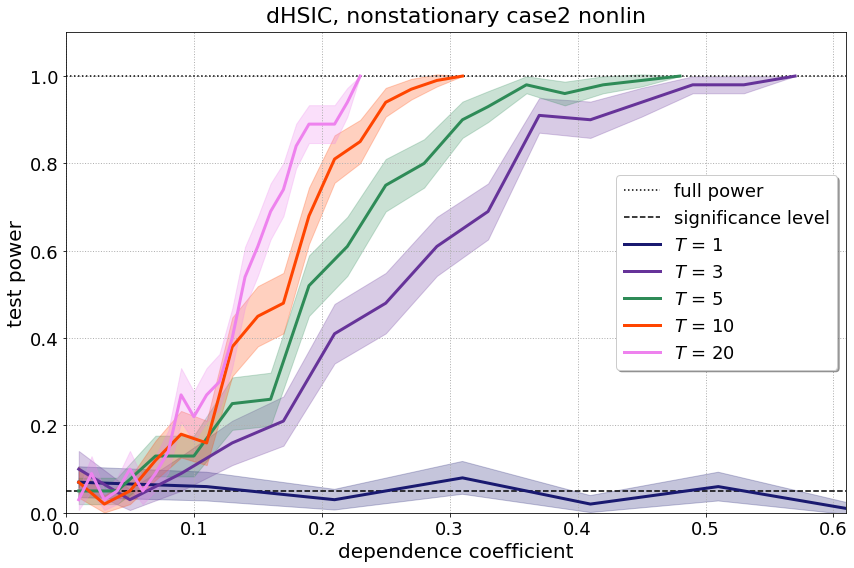

In [7]:
plt.figure(figsize=(12, 8))
plt.xlabel(r'dependence coefficient', size=20)
plt.ylabel(r'test power', size=20)
plt.ylim(0, 1.1)
plt.xlim(0.0, 0.61)
plt.hlines(y=1, xmin=0, xmax=1.1, colors='k', linestyles='dotted')
plt.hlines(y=0.05, xmin=0, xmax=1.1, colors='k', linestyles='dashed')

plt.title('dHSIC, nonstationary case2 nonlin', size=22, pad=10)
plt.plot(x1, y1, 'midnightblue', lw=3) 
plt.plot(x2, y2, 'rebeccapurple', lw=3) 
plt.plot(x3, y3, 'seagreen', lw=3) 
plt.plot(x4, y4, 'orangered', lw=3) 
plt.plot(x5, y5, 'violet', lw=3)

# error bars
error_1 = confidence(y1)
error_2 = confidence(y2)
error_3 = confidence(y3)
error_4 = confidence(y4)
error_5 = confidence(y5)

plt.fill_between(x1, y1-error_1, y1+error_1, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x2, y2-error_2, y2+error_2, interpolate=True, alpha=0.25, color='rebeccapurple')
plt.fill_between(x3, y3-error_3, y3+error_3, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x4, y4-error_4, y4+error_4, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x5, y5-error_5, y5+error_5, interpolate=True, alpha=0.25, color='violet')

plt.legend(['full power','significance level', '$T$ = 1', '$T$ = 3', '$T$ = 5', '$T$ = 10', '$T$ = 20'], loc=7, fontsize=18, framealpha=1, shadow=True)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)
plt.tight_layout()

plt.show()

In [ ]:
# case2_linear_100n_20t_1000p = {'0.01': 0.09, '0.02': 0.06, '0.03': 0.06, '0.04': 0.06, '0.05': 0.07, '0.06': 0.23, '0.07': 0.27, '0.08': 0.35, '0.09': 0.4, '0.1': 0.62, '0.11': 0.63, '0.12': 0.78, '0.13': 0.88, '0.14': 0.93, '0.15': 0.96, '0.16': 0.98, '0.17': 1}
# case2_linear_100n_20t_500p = {'0.01': 0.03, '0.03': 0.08, '0.05': 0.11, '0.07': 0.21, '0.09': 0.41, '0.11': 0.62, '0.13': 0.85, '0.15': 0.96, '0.17': 1.0, '0.19': 1.0}
# case2_linear_100n_20t_200p = {'0.01': 0.06, '0.03': 0.06, '0.05': 0.18, '0.07': 0.23, '0.09': 0.39, '0.11': 0.59, '0.13': 0.79, '0.15': 0.93, '0.17': 0.99, '0.19': 1.0}
# case2_linear_100n_20t_100p = {'0.01': 0.04, '0.03': 0.09, '0.05': 0.08, '0.07': 0.21, '0.09': 0.44, '0.11': 0.51, '0.13': 0.84, '0.15': 0.92, '0.178': 1.0}
# case2_linear_100n_20t_50p = {'0.01': 0.02, '0.03': 0.02, '0.05': 0.05, '0.07': 0.16, '0.09': 0.21, '0.11': 0.35, '0.13': 0.62, '0.15': 0.86, '0.17': 0.88, '0.19': 1.0}

In [176]:
# case2_linear_50n_20t_40p = {'0.01': 0.04, '0.03': 0.03, '0.05': 0.06, '0.07': 0.05, '0.09': 0.15, '0.11': 0.18, '0.13': 0.24, '0.15': 0.49, '0.17': 0.54, '0.19': 0.7, '0.21': 0.82, '0.23': 0.93, '0.25': 0.99, '0.27': 0.92, '0.29': 0.99, '0.31': 1}
case2_linear_50n_20t_50p = {'0.01': 0.04, '0.03': 0.03, '0.05': 0.05, '0.07': 0.01, '0.09': 0.08, '0.11': 0.17, '0.13': 0.31, '0.15': 0.35, '0.17': 0.5, '0.19': 0.71, '0.21': 0.71, '0.23': 0.87, '0.25': 0.93, '0.27': 0.96, '0.29': 1.0}
case2_linear_50n_20t_100p = {'0.01': 0.02, '0.03': 0.02, '0.05': 0.09, '0.07': 0.1, '0.09': 0.19, '0.11': 0.19, '0.13': 0.37, '0.15': 0.5, '0.17': 0.6, '0.19': 0.76, '0.21': 0.94, '0.23': 0.96, '0.25': 0.99, '0.27': 1.0, '0.29': 1.0}
case2_linear_50n_20t_200p = {'0.01': 0.01, '0.03': 0.03, '0.05': 0.04, '0.07': 0.12, '0.09': 0.21, '0.11': 0.36, '0.13': 0.35, '0.15': 0.59, '0.17': 0.73, '0.19': 0.86, '0.21': 0.9, '0.23': 0.97, '0.25': 0.99, '0.27': 1.0, '0.29': 1.0}
case2_linear_50n_20t_500p = {'0.01': 0.05, '0.03': 0.03, '0.05': 0.08, '0.07': 0.09, '0.09': 0.14, '0.11': 0.29, '0.13': 0.43, '0.15': 0.61, '0.17': 0.68, '0.19': 0.85, '0.21': 0.89, '0.23': 0.95, '0.25': 0.99, '0.27': 1.0, '0.29': 1.0}
case2_linear_50n_20t_1000p = {'0.01': 0.05, '0.03': 0.06, '0.05': 0.09, '0.07': 0.16, '0.09': 0.18, '0.11': 0.26, '0.13': 0.41, '0.15': 0.66, '0.17': 0.71, '0.19': 0.82, '0.21': 0.93, '0.23': 0.99, '0.25': 0.99, '0.27': 1.0, '0.29': 1.0}
case2_linear_50n_20t_2000p = {'0.01': 0.04, '0.03': 0.05, '0.05': 0.08, '0.07': 0.08, '0.09': 0.24, '0.11': 0.35, '0.13': 0.43, '0.15': 0.62, '0.17': 0.7, '0.19': 0.81, '0.21': 0.9, '0.23': 0.97, '0.25': 0.99, '0.27': 1.0, '0.29': 1.0}
case2_linear_50n_20t_3000p = {'0.01': 0.03, '0.03': 0.0, '0.05': 0.08, '0.07': 0.08, '0.09': 0.22, '0.11': 0.3, '0.13': 0.43, '0.15': 0.53, '0.17': 0.67, '0.19': 0.78, '0.21': 0.9, '0.23': 0.98, '0.25': 0.97, '0.27': 1.0, '0.29': 1.0}
case2_linear_50n_20t_4000p = {'0.01': 0.04, '0.03': 0.06, '0.05': 0.12, '0.07': 0.16, '0.09': 0.2, '0.11': 0.36, '0.13': 0.41, '0.15': 0.6, '0.17': 0.65, '0.19': 0.82, '0.21': 0.94, '0.23': 0.94, '0.25': 0.98, '0.27': 0.99, '0.29': 1.0}

In [177]:
y1 = list(case2_linear_50n_20t_50p.values())
y2 = list(case2_linear_50n_20t_100p.values())
y3 = list(case2_linear_50n_20t_200p.values())
y4 = list(case2_linear_50n_20t_500p.values())
y5 = list(case2_linear_50n_20t_1000p.values())
y6 = list(case2_linear_50n_20t_2000p.values())
y7 = list(case2_linear_50n_20t_3000p.values())
y8 = list(case2_linear_50n_20t_4000p.values())

In [178]:
x = np.arange(0.01, 0.3, 0.02)

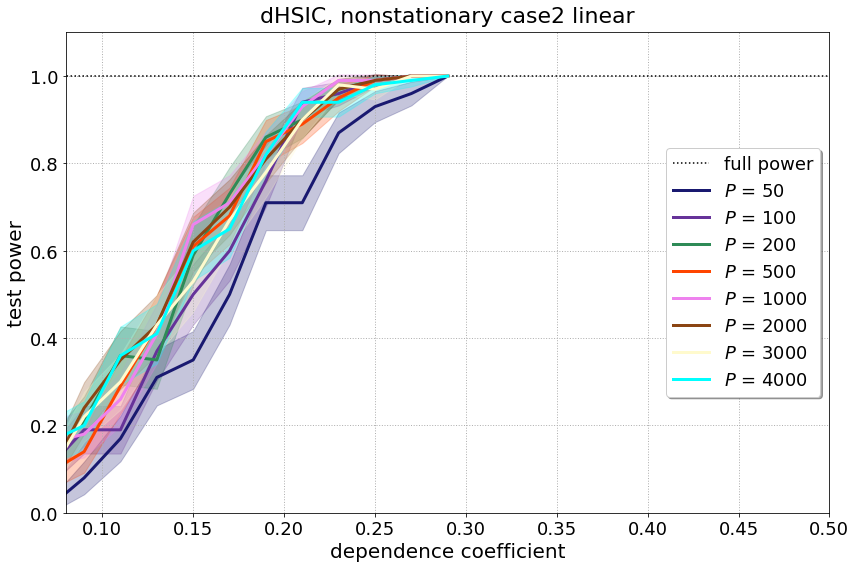

In [179]:
plt.figure(figsize=(12, 8))
plt.xlabel(r'dependence coefficient', size=20)
plt.ylabel(r'test power', size=20)
plt.ylim(0, 1.1)
plt.xlim(0.08, 0.50)
plt.hlines(y=1, xmin=0, xmax=1.1, colors='k', linestyles='dotted')

plt.title('dHSIC, nonstationary case2 linear', size=22, pad=10)
plt.plot(x, y1, 'midnightblue', lw=3) 
plt.plot(x, y2, 'rebeccapurple', lw=3) 
plt.plot(x, y3, 'seagreen', lw=3) 
plt.plot(x, y4, 'orangered', lw=3) 
plt.plot(x, y5, 'violet', lw=3)
plt.plot(x, y6, 'saddlebrown', lw=3) 
plt.plot(x, y7, 'lemonchiffon', lw=3) 
plt.plot(x, y8, 'aqua', lw=3)
# error bars
error_1 = confidence(y1)
error_2 = confidence(y2)
error_3 = confidence(y3)
error_4 = confidence(y4)
error_5 = confidence(y5)
error_6 = confidence(y6)
error_7 = confidence(y7)
error_8 = confidence(y8)
plt.fill_between(x, y1-error_1, y1+error_1, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x, y2-error_2, y2+error_2, interpolate=True, alpha=0.25, color='rebeccapurple')
plt.fill_between(x, y3-error_3, y3+error_3, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x, y4-error_4, y4+error_4, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x, y5-error_5, y5+error_5, interpolate=True, alpha=0.25, color='violet')
plt.fill_between(x, y6-error_6, y6+error_6, interpolate=True, alpha=0.25, color='saddlebrown')
plt.fill_between(x, y7-error_7, y7+error_7, interpolate=True, alpha=0.25, color='lemonchiffon')
plt.fill_between(x, y8-error_8, y8+error_8, interpolate=True, alpha=0.25, color='aqua')

plt.legend(['full power', '$P$ = 50', '$P$ = 100', '$P$ = 200', '$P$ = 500', '$P$ = 1000', '$P$ = 2000','$P$ = 3000', '$P$ = 4000'], loc=7, fontsize=18, framealpha=1, shadow=True)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)
plt.tight_layout()
plt.savefig('svg/nonstat_2_lin_perm.svg', format='svg', dpi=300)
plt.show()

## case2.1

In [150]:
case21_100n_20t_1000p = {'0.01': 0.16, '0.02': 0.35, '0.03': 0.73, '0.04': 0.94, '0.05': 1.0}
case21_80n_20t_1000p = {'0.01': 0.09, '0.02': 0.29, '0.03': 0.58, '0.04': 0.92, '0.05': 0.99, '0.06': 0.99, '0.07': 1.0}
case21_60n_20t_1000p = {'0.01': 0.07, '0.02': 0.33, '0.03': 0.49, '0.04': 0.65, '0.05': 0.93, '0.06': 0.99, '0.07': 1.0}
case21_40n_20t_1000p = {'0.01': 0.08, '0.02': 0.14, '0.03': 0.32, '0.04': 0.57, '0.05': 0.74, '0.06': 0.91, '0.07': 0.93, '0.08': 0.99, '0.09': 1.0}
case21_20n_20t_1000p = {'0.01': 0.09, '0.02': 0.09, '0.03': 0.12, '0.04': 0.23, '0.05': 0.4, '0.06': 0.5, '0.07': 0.68, '0.08': 0.78, '0.09': 0.86, '0.10': 0.85, '0.11': 0.93, '0.12': 0.97, '0.13': 0.96, '0.13999999999999996': 0.98, '0.15': 1.0}

In [151]:
y5 = list(case21_100n_20t_1000p.values())
x5 = [float(x.strip(' "')) for x in list(case21_100n_20t_1000p.keys())]

y4 = list(case21_80n_20t_1000p.values())
x4 = [float(x.strip(' "')) for x in list(case21_80n_20t_1000p.keys())]

y3 = list(case21_60n_20t_1000p.values())
x3 = [float(x.strip(' "')) for x in list(case21_60n_20t_1000p.keys())]
      
y2 = list(case21_40n_20t_1000p.values())
x2 = [float(x.strip(' "')) for x in list(case21_40n_20t_1000p.keys())]

y1 = list(case21_20n_20t_1000p.values())
x1 = [float(x.strip(' "')) for x in list(case21_20n_20t_1000p.keys())]

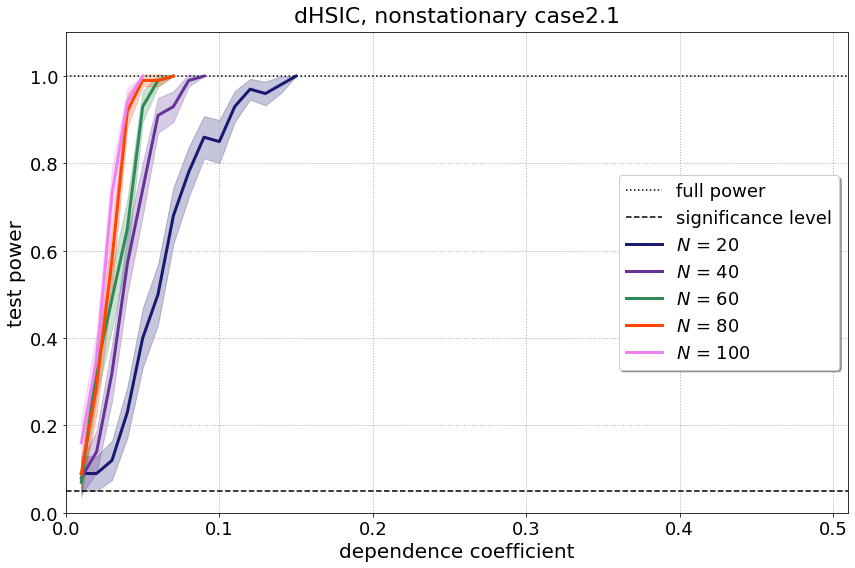

In [153]:
plt.figure(figsize=(12, 8))
plt.xlabel(r'dependence coefficient', size=20)
plt.ylabel(r'test power', size=20)
plt.ylim(0, 1.1)
plt.xlim(0.0, 0.51)
plt.hlines(y=1, xmin=0, xmax=1.1, colors='k', linestyles='dotted')
plt.hlines(y=0.05, xmin=0, xmax=1.1, colors='k', linestyles='dashed')

plt.title('dHSIC, nonstationary case2.1', size=22, pad=10)
plt.plot(x1, y1, 'midnightblue', lw=3) 
plt.plot(x2, y2, 'rebeccapurple', lw=3) 
plt.plot(x3, y3, 'seagreen', lw=3) 
plt.plot(x4, y4, 'orangered', lw=3) 
plt.plot(x5, y5, 'violet', lw=3)

# error bars
error_1 = confidence(y1)
error_2 = confidence(y2)
error_3 = confidence(y3)
error_4 = confidence(y4)
error_5 = confidence(y5)

plt.fill_between(x1, y1-error_1, y1+error_1, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x2, y2-error_2, y2+error_2, interpolate=True, alpha=0.25, color='rebeccapurple')
plt.fill_between(x3, y3-error_3, y3+error_3, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x4, y4-error_4, y4+error_4, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x5, y5-error_5, y5+error_5, interpolate=True, alpha=0.25, color='violet')

plt.legend(['full power','significance level', '$N$ = 20', '$N$ = 40', '$N$ = 60', '$N$ = 80', '$N$ = 100'], loc=7, fontsize=18, framealpha=1, shadow=True)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)
plt.tight_layout()
plt.savefig('svg/case21_n.svg', format='svg', dpi=300)
plt.show()

In [154]:
case21_40n_20t_1000p = {'0.01': 0.08, '0.02': 0.14, '0.03': 0.32, '0.04': 0.57, '0.05': 0.74, '0.06': 0.91, '0.07': 0.93, '0.08': 0.99, '0.09': 1.0} 
case21_40n_10t_1000p = {'0.01': 0.05, '0.02': 0.05, '0.03': 0.07, '0.04': 0.17, '0.05': 0.2, '0.06': 0.31, '0.07': 0.43, '0.08': 0.56, '0.09': 0.75, '0.10': 0.76, '0.11': 0.93, '0.12': 0.91, '0.13': 0.95, '0.14': 0.97, '0.15': 1.0, '0.16': 1.0, '0.17': 0.99, '0.18': 1.0, '0.19': 1.0}
case21_40n_5t_1000p = {'0.01': 0.02, '0.04': 0.07, '0.07': 0.13, '0.1': 0.23, '0.13': 0.42, '0.16': 0.61, '0.19': 0.75, '0.22': 0.87, '0.25': 0.97, '0.28': 1.0, '0.31': 0.99, '0.34': 1.0, '0.37': 1.0, '0.4': 1.0}
case21_40n_3t_1000p = {'0.01': 0.05, '0.04': 0.09, '0.07': 0.03, '0.1': 0.13, '0.13': 0.15, '0.16': 0.26, '0.19': 0.28, '0.22': 0.52, '0.25': 0.44, '0.28': 0.62, '0.31': 0.72, '0.34': 0.81, '0.37': 0.87, '0.4': 0.96, '0.43': 0.96, '0.46': 0.98, '0.49': 0.97, '0.5': 0.99, '0.53': 0.99, '0.56': 0.99, '0.59': 1.0}
case21_40n_1t_1000p = {'0.01': 0.06, '0.06': 0.01, '0.11': 0.05, '0.16': 0.04, '0.21': 0.03, '0.26': 0.04, '0.31': 0.03, '0.36': 0.02, '0.41': 0.07, '0.46': 0.02, '0.51': 0.06, '0.56': 0.04}

In [155]:
y5 = list(case21_40n_20t_1000p.values())
x5 = [float(x.strip(' "')) for x in list(case21_40n_20t_1000p.keys())]

y4 = list(case21_40n_10t_1000p.values())
x4 = [float(x.strip(' "')) for x in list(case21_40n_10t_1000p.keys())]

y3 = list(case21_40n_5t_1000p.values())
x3 = [float(x.strip(' "')) for x in list(case21_40n_5t_1000p.keys())]
      
y2 = list(case21_40n_3t_1000p.values())
x2 = [float(x.strip(' "')) for x in list(case21_40n_3t_1000p.keys())]

y1 = list(case21_40n_1t_1000p.values())
x1 = [float(x.strip(' "')) for x in list(case21_40n_1t_1000p.keys())]

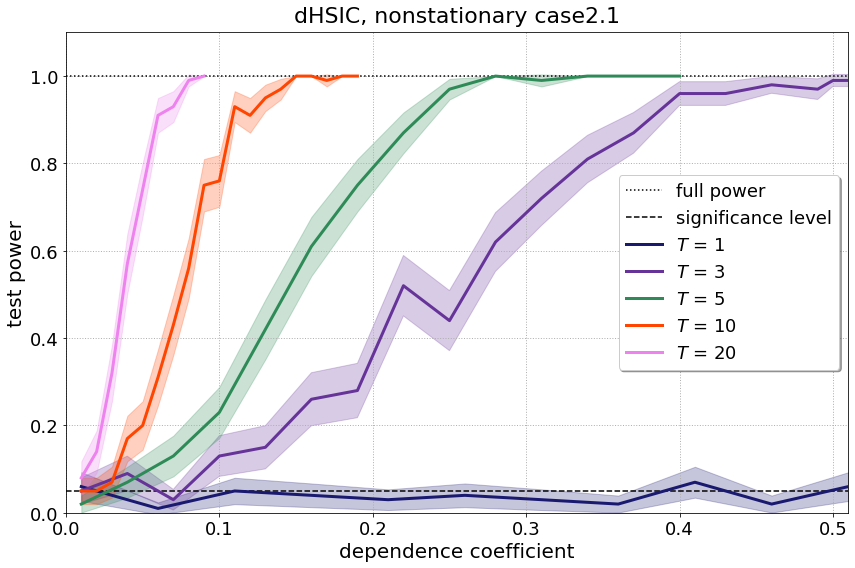

In [157]:
plt.figure(figsize=(12, 8))
plt.xlabel(r'dependence coefficient', size=20)
plt.ylabel(r'test power', size=20)
plt.ylim(0, 1.1)
plt.xlim(0.0, 0.51)
plt.hlines(y=1, xmin=0, xmax=1.1, colors='k', linestyles='dotted')
plt.hlines(y=0.05, xmin=0, xmax=1.1, colors='k', linestyles='dashed')

plt.title('dHSIC, nonstationary case2.1', size=22, pad=10)
plt.plot(x1, y1, 'midnightblue', lw=3) 
plt.plot(x2, y2, 'rebeccapurple', lw=3) 
plt.plot(x3, y3, 'seagreen', lw=3) 
plt.plot(x4, y4, 'orangered', lw=3) 
plt.plot(x5, y5, 'violet', lw=3)

# error bars
error_1 = confidence(y1)
error_2 = confidence(y2)
error_3 = confidence(y3)
error_4 = confidence(y4)
error_5 = confidence(y5)

plt.fill_between(x1, y1-error_1, y1+error_1, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x2, y2-error_2, y2+error_2, interpolate=True, alpha=0.25, color='rebeccapurple')
plt.fill_between(x3, y3-error_3, y3+error_3, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x4, y4-error_4, y4+error_4, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x5, y5-error_5, y5+error_5, interpolate=True, alpha=0.25, color='violet')

plt.legend(['full power','significance level', '$T$ = 1', '$T$ = 3', '$T$ = 5', '$T$ = 10', '$T$ = 20'], loc=7, fontsize=18, framealpha=1, shadow=True)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)
plt.tight_layout()
plt.savefig('svg/case21_t.svg', format='svg', dpi=300)
plt.show()

## case 2.2

In [158]:
case22_100n_20t_1000p = {'0.01': 0.07, '0.02': 0.3, '0.03': 0.75, '0.04': 0.99, '0.05': 1.0}
case22_80n_20t_1000p = {'0.01': 0.08, '0.02': 0.29, '0.03': 0.57, '0.04': 0.88, '0.05': 1.0}
case22_60n_20t_1000p = {'0.01': 0.08, '0.02': 0.22, '0.03': 0.41, '0.04': 0.81, '0.05': 0.93, '0.06': 0.98, '0.07': 1.0}
case22_40n_20t_1000p = {'0.01': 0.08, '0.02': 0.24, '0.03': 0.29, '0.04': 0.55, '0.05': 0.85, '0.06': 0.9, '0.07': 0.95, '0.08': 0.99, '0.09': 1.0}
case22_20n_20t_1000p = {'0.01': 0.06, '0.02': 0.09, '0.03': 0.22, '0.04': 0.26, '0.05': 0.43, '0.06': 0.61, '0.07': 0.63, '0.08': 0.69, '0.09': 0.82, '0.1': 0.88, '0.11': 0.91, '0.12': 0.96, '0.13': 0.97, '0.14': 1.0}

In [159]:
y5 = list(case22_100n_20t_1000p.values())
x5 = [float(x.strip(' "')) for x in list(case22_100n_20t_1000p.keys())]

y4 = list(case22_80n_20t_1000p.values())
x4 = [float(x.strip(' "')) for x in list(case22_80n_20t_1000p.keys())]

y3 = list(case22_60n_20t_1000p.values())
x3 = [float(x.strip(' "')) for x in list(case22_60n_20t_1000p.keys())]
      
y2 = list(case22_40n_20t_1000p.values())
x2 = [float(x.strip(' "')) for x in list(case22_40n_20t_1000p.keys())]

y1 = list(case22_20n_20t_1000p.values())
x1 = [float(x.strip(' "')) for x in list(case22_20n_20t_1000p.keys())]

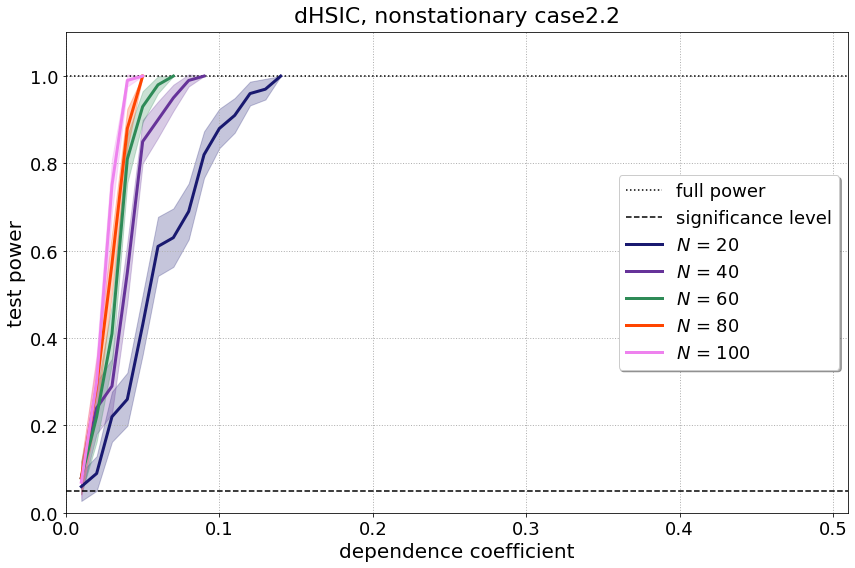

In [160]:
plt.figure(figsize=(12, 8))
plt.xlabel(r'dependence coefficient', size=20)
plt.ylabel(r'test power', size=20)
plt.ylim(0, 1.1)
plt.xlim(0.0, 0.51)
plt.hlines(y=1, xmin=0, xmax=1.1, colors='k', linestyles='dotted')
plt.hlines(y=0.05, xmin=0, xmax=1.1, colors='k', linestyles='dashed')

plt.title('dHSIC, nonstationary case2.2', size=22, pad=10)
plt.plot(x1, y1, 'midnightblue', lw=3) 
plt.plot(x2, y2, 'rebeccapurple', lw=3) 
plt.plot(x3, y3, 'seagreen', lw=3) 
plt.plot(x4, y4, 'orangered', lw=3) 
plt.plot(x5, y5, 'violet', lw=3)

# error bars
error_1 = confidence(y1)
error_2 = confidence(y2)
error_3 = confidence(y3)
error_4 = confidence(y4)
error_5 = confidence(y5)

plt.fill_between(x1, y1-error_1, y1+error_1, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x2, y2-error_2, y2+error_2, interpolate=True, alpha=0.25, color='rebeccapurple')
plt.fill_between(x3, y3-error_3, y3+error_3, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x4, y4-error_4, y4+error_4, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x5, y5-error_5, y5+error_5, interpolate=True, alpha=0.25, color='violet')

plt.legend(['full power','significance level', '$N$ = 20', '$N$ = 40', '$N$ = 60', '$N$ = 80', '$N$ = 100'], loc=7, fontsize=18, framealpha=1, shadow=True)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)
plt.tight_layout()
plt.savefig('svg/case22_n.svg', format='svg', dpi=300)
plt.show()

In [161]:
case22_40n_20t_1000p = {'0.01': 0.08, '0.02': 0.24, '0.03': 0.29, '0.04': 0.55, '0.05': 0.85, '0.06': 0.9, '0.07': 0.95, '0.08': 0.99, '0.09': 1.0}
case22_40n_10t_1000p = {'0.01': 0.02, '0.02': 0.14, '0.03': 0.11, '0.04': 0.18, '0.05': 0.23, '0.06': 0.33, '0.07': 0.54, '0.08': 0.53, '0.09': 0.72, '0.10': 0.82, '0.11': 0.86, '0.12': 0.95, '0.13': 0.96, '0.14': 0.97, '0.15': 1.0}
case22_40n_5t_1000p = {'0.01': 0.08, '0.02': 0.03, '0.03': 0.03, '0.04': 0.08, '0.05': 0.16, '0.06': 0.1, '0.07': 0.18, '0.08': 0.2, '0.09': 0.16, '0.10': 0.23, '0.11': 0.34, '0.12': 0.36, '0.13': 0.42, '0.14': 0.49, '0.15': 0.62, '0.16': 0.6, '0.17': 0.67, '0.18': 0.72, '0.19': 0.79, '0.2': 0.75, '0.22': 0.93, '0.24': 0.92, '0.26': 0.97, '0.28': 0.97, '0.30': 0.99, '0.32': 0.99, '0.34': 1.0}
case22_40n_3t_1000p = {'0.01': 0.04, '0.03': 0.01, '0.05': 0.09, '0.07': 0.1, '0.09': 0.1, '0.11': 0.12, '0.13': 0.22, '0.15': 0.16, '0.17': 0.25, '0.19': 0.32, '0.21': 0.35, '0.23': 0.41, '0.25': 0.53, '0.27': 0.64, '0.29': 0.71, '0.3': 0.73, '0.32': 0.73, '0.34': 0.83, '0.36': 0.81, '0.38': 0.85, '0.40': 0.91, '0.42': 0.96, '0.44': 0.96, '0.46': 0.97, '0.48': 0.97, '0.5': 1.0}
case22_40n_1t_1000p = {'0.01': 0.04, '0.06': 0.02, '0.11': 0.03, '0.16': 0.09, '0.21': 0.04, '0.26': 0.08, '0.31': 0.09, '0.36': 0.03, '0.41': 0.01, '0.46': 0.04, '0.51': 0.03}

In [162]:
y5 = list(case22_40n_20t_1000p.values())
x5 = [float(x.strip(' "')) for x in list(case22_40n_20t_1000p.keys())]

y4 = list(case22_40n_10t_1000p.values())
x4 = [float(x.strip(' "')) for x in list(case22_40n_10t_1000p.keys())]

y3 = list(case22_40n_5t_1000p.values())
x3 = [float(x.strip(' "')) for x in list(case22_40n_5t_1000p.keys())]
      
y2 = list(case22_40n_3t_1000p.values())
x2 = [float(x.strip(' "')) for x in list(case22_40n_3t_1000p.keys())]

y1 = list(case22_40n_1t_1000p.values())
x1 = [float(x.strip(' "')) for x in list(case22_40n_1t_1000p.keys())]

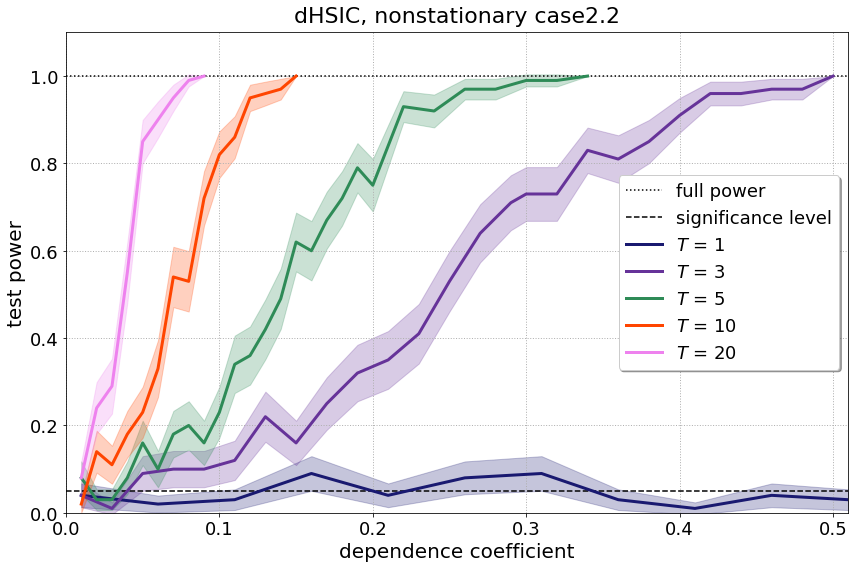

In [163]:
plt.figure(figsize=(12, 8))
plt.xlabel(r'dependence coefficient', size=20)
plt.ylabel(r'test power', size=20)
plt.ylim(0, 1.1)
plt.xlim(0.0, 0.51)
plt.hlines(y=1, xmin=0, xmax=1.1, colors='k', linestyles='dotted')
plt.hlines(y=0.05, xmin=0, xmax=1.1, colors='k', linestyles='dashed')

plt.title('dHSIC, nonstationary case2.2', size=22, pad=10)
plt.plot(x1, y1, 'midnightblue', lw=3) 
plt.plot(x2, y2, 'rebeccapurple', lw=3) 
plt.plot(x3, y3, 'seagreen', lw=3) 
plt.plot(x4, y4, 'orangered', lw=3) 
plt.plot(x5, y5, 'violet', lw=3)

# error bars
error_1 = confidence(y1)
error_2 = confidence(y2)
error_3 = confidence(y3)
error_4 = confidence(y4)
error_5 = confidence(y5)

plt.fill_between(x1, y1-error_1, y1+error_1, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x2, y2-error_2, y2+error_2, interpolate=True, alpha=0.25, color='rebeccapurple')
plt.fill_between(x3, y3-error_3, y3+error_3, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x4, y4-error_4, y4+error_4, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x5, y5-error_5, y5+error_5, interpolate=True, alpha=0.25, color='violet')

plt.legend(['full power','significance level', '$T$ = 1', '$T$ = 3', '$T$ = 5', '$T$ = 10', '$T$ = 20'], loc=7, fontsize=18, framealpha=1, shadow=True)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)
plt.tight_layout()
plt.savefig('svg/case22_t.svg', format='svg', dpi=300)
plt.show()

## case2.3

In [164]:
case23_100n_20t_1000p = {'0.01': 0.07, '0.03': 0.17, '0.05': 0.32, '0.07': 0.69, '0.09': 0.87, '0.11': 0.96, '0.13': 0.99, '0.15': 1.0}
case23_80n_20t_1000p = {'0.01': 0.04, '0.03': 0.07, '0.05': 0.29, '0.07': 0.5, '0.09': 0.74, '0.11': 0.94, '0.13': 0.99, '0.15': 1.0}
case23_60n_20t_1000p = {'0.01': 0.02, '0.03': 0.09, '0.05': 0.18, '0.07': 0.32, '0.09': 0.58, '0.11': 0.8, '0.13': 0.88, '0.15': 0.98, '0.17': 0.99, '0.19': 1}
case23_40n_20t_1000p = {'0.01': 0.03, '0.03': 0.07, '0.05': 0.11, '0.07': 0.24, '0.09': 0.41, '0.11': 0.57, '0.13': 0.61, '0.15': 0.9, '0.17': 0.9, '0.19': 0.98, '0.21': 1.0}
case23_20n_20t_1000p = {'0.01': 0.04, '0.03': 0.06, '0.05': 0.11, '0.07': 0.14, '0.09': 0.18, '0.11': 0.21, '0.13': 0.38, '0.15': 0.5, '0.17': 0.65, '0.19': 0.59, '0.21': 0.7, '0.23': 0.85, '0.25': 0.85, '0.27': 0.92, '0.29': 0.93, '0.3': 0.9, '0.32': 0.96, '0.34': 0.97, '0.36': 0.99, '0.38': 1.0}

In [165]:
y5 = list(case23_100n_20t_1000p.values())
x5 = [float(x.strip(' "')) for x in list(case23_100n_20t_1000p.keys())]

y4 = list(case23_80n_20t_1000p.values())
x4 = [float(x.strip(' "')) for x in list(case23_80n_20t_1000p.keys())]

y3 = list(case23_60n_20t_1000p.values())
x3 = [float(x.strip(' "')) for x in list(case23_60n_20t_1000p.keys())]
      
y2 = list(case23_40n_20t_1000p.values())
x2 = [float(x.strip(' "')) for x in list(case23_40n_20t_1000p.keys())]

y1 = list(case23_20n_20t_1000p.values())
x1 = [float(x.strip(' "')) for x in list(case23_20n_20t_1000p.keys())]

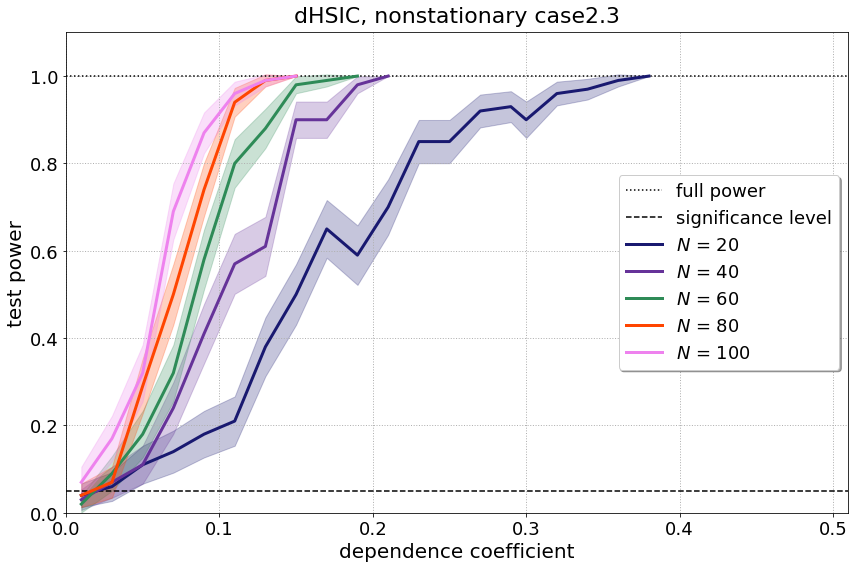

In [166]:
plt.figure(figsize=(12, 8))
plt.xlabel(r'dependence coefficient', size=20)
plt.ylabel(r'test power', size=20)
plt.ylim(0, 1.1)
plt.xlim(0.0, 0.51)
plt.hlines(y=1, xmin=0, xmax=1.1, colors='k', linestyles='dotted')
plt.hlines(y=0.05, xmin=0, xmax=1.1, colors='k', linestyles='dashed')

plt.title('dHSIC, nonstationary case2.3', size=22, pad=10)
plt.plot(x1, y1, 'midnightblue', lw=3) 
plt.plot(x2, y2, 'rebeccapurple', lw=3) 
plt.plot(x3, y3, 'seagreen', lw=3) 
plt.plot(x4, y4, 'orangered', lw=3) 
plt.plot(x5, y5, 'violet', lw=3)

# error bars
error_1 = confidence(y1)
error_2 = confidence(y2)
error_3 = confidence(y3)
error_4 = confidence(y4)
error_5 = confidence(y5)

plt.fill_between(x1, y1-error_1, y1+error_1, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x2, y2-error_2, y2+error_2, interpolate=True, alpha=0.25, color='rebeccapurple')
plt.fill_between(x3, y3-error_3, y3+error_3, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x4, y4-error_4, y4+error_4, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x5, y5-error_5, y5+error_5, interpolate=True, alpha=0.25, color='violet')

plt.legend(['full power','significance level', '$N$ = 20', '$N$ = 40', '$N$ = 60', '$N$ = 80', '$N$ = 100'], loc=7, fontsize=18, framealpha=1, shadow=True)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)
plt.tight_layout()
plt.savefig('svg/case23_n.svg', format='svg', dpi=300)
plt.show()

In [167]:
case23_40n_30t_1000p = {'0.01': 0.04, '0.02': 0.07, '0.03': 0.17, '0.04': 0.29, '0.05': 0.57, '0.06': 0.67, '0.07': 0.77, '0.08': 0.87, '0.09': 0.93, '0.1': 0.96, '0.11': 1.0}
case23_40n_20t_1000p = {'0.01': 0.03, '0.03': 0.07, '0.05': 0.11, '0.07': 0.24, '0.09': 0.41, '0.11': 0.57, '0.13': 0.61, '0.15': 0.9, '0.17': 0.9, '0.19': 0.98, '0.21': 1.0}
case23_40n_10t_1000p = {'0.01': 0.06, '0.11': 0.06, '0.21': 0.11, '0.31': 0.22, '0.41': 0.48, '0.51': 0.65, '0.61': 0.7, '0.71': 0.92, '0.81': 0.97, '0.91': 1}
case23_40n_5t_1000p = {'0.01': 0.05, '0.11': 0.06, '0.21': 0.03, '0.31': 0.05, '0.41': 0.02, '0.51': 0.04, '0.61': 0.03, '0.71': 0.08, '0.81': 0.09, '0.91': 0.06}
case23_40n_3t_1000p = {'0.01': 0.02, '0.11': 0.05, '0.21': 0.04, '0.31': 0.04, '0.41': 0.04, '0.51': 0.03, '0.61': 0.07, '0.71': 0.04, '0.81': 0.09, '0.91': 0.05}

In [168]:
y4 = list(case23_40n_20t_1000p.values())
x4 = [float(x.strip(' "')) for x in list(case23_40n_20t_1000p.keys())]

y3 = list(case23_40n_10t_1000p.values())
x3 = [float(x.strip(' "')) for x in list(case23_40n_10t_1000p.keys())]

y2 = list(case23_40n_5t_1000p.values())
x2 = [float(x.strip(' "')) for x in list(case23_40n_5t_1000p.keys())]
      
y1 = list(case23_40n_3t_1000p.values())
x1 = [float(x.strip(' "')) for x in list(case23_40n_3t_1000p.keys())]

y5 = list(case23_40n_30t_1000p.values())
x5 = [float(x.strip(' "')) for x in list(case23_40n_30t_1000p.keys())]

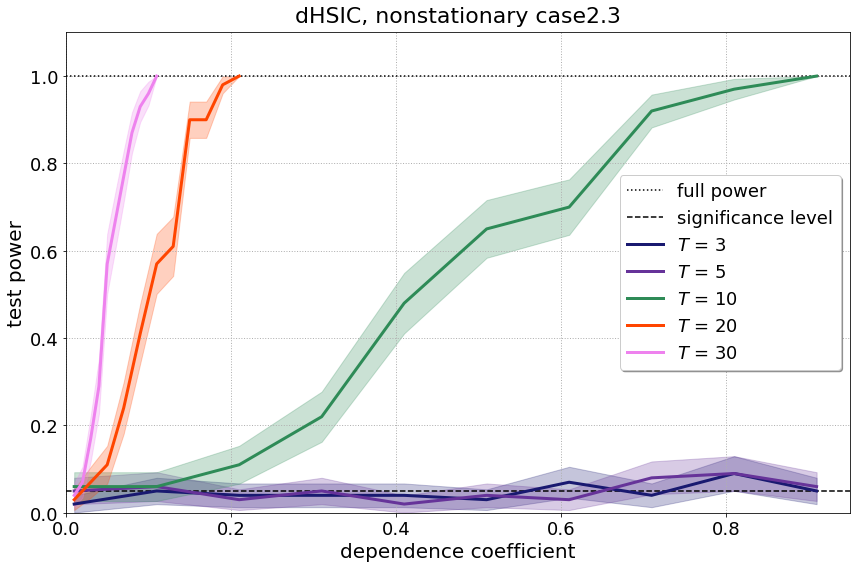

In [169]:
plt.figure(figsize=(12, 8))
plt.xlabel(r'dependence coefficient', size=20)
plt.ylabel(r'test power', size=20)
plt.ylim(0, 1.1)
plt.xlim(0.0, 0.95)
plt.hlines(y=1, xmin=0, xmax=1.1, colors='k', linestyles='dotted')
plt.hlines(y=0.05, xmin=0, xmax=1.1, colors='k', linestyles='dashed')

plt.title('dHSIC, nonstationary case2.3', size=22, pad=10)
plt.plot(x1, y1, 'midnightblue', lw=3) 
plt.plot(x2, y2, 'rebeccapurple', lw=3) 
plt.plot(x3, y3, 'seagreen', lw=3) 
plt.plot(x4, y4, 'orangered', lw=3) 
plt.plot(x5, y5, 'violet', lw=3)

# error bars
error_1 = confidence(y1)
error_2 = confidence(y2)
error_3 = confidence(y3)
error_4 = confidence(y4)
error_5 = confidence(y5)

plt.fill_between(x1, y1-error_1, y1+error_1, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x2, y2-error_2, y2+error_2, interpolate=True, alpha=0.25, color='rebeccapurple')
plt.fill_between(x3, y3-error_3, y3+error_3, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x4, y4-error_4, y4+error_4, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x5, y5-error_5, y5+error_5, interpolate=True, alpha=0.25, color='violet')

plt.legend(['full power','significance level', '$T$ = 3', '$T$ = 5', '$T$ = 10', '$T$ = 20', '$T$ = 30'], loc=7, fontsize=18, framealpha=1, shadow=True)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)
plt.tight_layout()
plt.savefig('svg/case23_t.svg', format='svg', dpi=300)
plt.show()

In [67]:
# case1.1

In [170]:
# case11_140n_20t_1000p = {'0.01': 0.23, '0.02': 0.76, '0.03': 0.94, '0.04': 1.0}
case11_120n_20t_1000p = {'0.01': 0.18, '0.02': 0.66, '0.03': 0.94, '0.04': 1.0}
case11_100n_20t_1000p = {'0.01': 0.09, '0.02': 0.61, '0.03': 0.79, '0.04': 0.95, '0.05': 0.97, '0.06': 0.95, '0.07': 0.97, '0.08': 0.94, '0.09': 0.96, '0.1': 0.96, '0.11': 0.98, '0.12': 0.99, '0.13': 1}
case11_80n_20t_1000p = {'0.01': 0.12, '0.02': 0.43, '0.03': 0.7, '0.04': 0.71, '0.05': 0.86, '0.06': 0.89, '0.07': 0.84, '0.08': 0.92, '0.09': 0.88, '0.1': 0.88, '0.11': 0.85, '0.12': 0.87, '0.13': 0.93, '0.14': 0.9, '0.15': 0.89, '0.16': 0.91, '0.17': 0.88, '0.18': 0.87, '0.22': 0.88, '0.26': 0.91, '0.3': 0.91, '0.34': 0.94, '0.38': 0.95, '0.42': 0.91, '0.46': 0.92}
case11_60n_20t_1000p = {'0.01': 0.09, '0.02': 0.26, '0.03': 0.49, '0.04': 0.62, '0.05': 0.63, '0.06': 0.61, '0.07': 0.66, '0.08': 0.76, '0.09': 0.7, '0.1': 0.71, '0.11': 0.76, '0.12': 0.74, '0.13': 0.72, '0.14': 0.66, '0.15': 0.7, '0.16': 0.68, '0.17': 0.8, '0.18': 0.63, '0.18': 0.64, '0.2': 0.76, '0.22': 0.67, '0.24': 0.69, '0.26': 0.67, '0.28': 0.73, '0.3': 0.77, '0.32': 0.73, '0.34': 0.72, '0.36': 0.74, '0.38': 0.75, '0.4': 0.64, '0.42': 0.77, '0.44': 0.75, '0.46': 0.79, '0.48': 0.72}
case11_40n_20t_1000p = {'0.01': 0.1, '0.02': 0.17, '0.03': 0.33, '0.04': 0.35, '0.05': 0.34, '0.06': 0.41, '0.07': 0.37, '0.08': 0.42, '0.09': 0.48, '0.1': 0.42, '0.11': 0.42, '0.12': 0.49, '0.13': 0.4, '0.14': 0.48, '0.15': 0.47, '0.16': 0.46, '0.17': 0.43, '0.18': 0.48, '0.19': 0.45, '0.2': 0.42, '0.21': 0.4, '0.22': 0.52, '0.23': 0.36, '0.24': 0.45, '0.25': 0.54, '0.26': 0.5, '0.27': 0.46, '0.28': 0.48, '0.3': 0.38, '0.32': 0.5, '0.34': 0.51, '0.36': 0.53, '0.38': 0.48, '0.4': 0.48, '0.42': 0.37, '0.44': 0.47, '0.46': 0.47, '0.48': 0.49}

In [171]:
y5 = list(case11_120n_20t_1000p.values())
x5 = [float(x.strip(' "')) for x in list(case11_120n_20t_1000p.keys())]

y4 = list(case11_100n_20t_1000p.values())
x4 = [float(x.strip(' "')) for x in list(case11_100n_20t_1000p.keys())]

y3 = list(case11_80n_20t_1000p.values())
x3 = [float(x.strip(' "')) for x in list(case11_80n_20t_1000p.keys())]
      
y2 = list(case11_60n_20t_1000p.values())
x2 = [float(x.strip(' "')) for x in list(case11_60n_20t_1000p.keys())]

y1 = list(case11_40n_20t_1000p.values())
x1 = [float(x.strip(' "')) for x in list(case11_40n_20t_1000p.keys())]

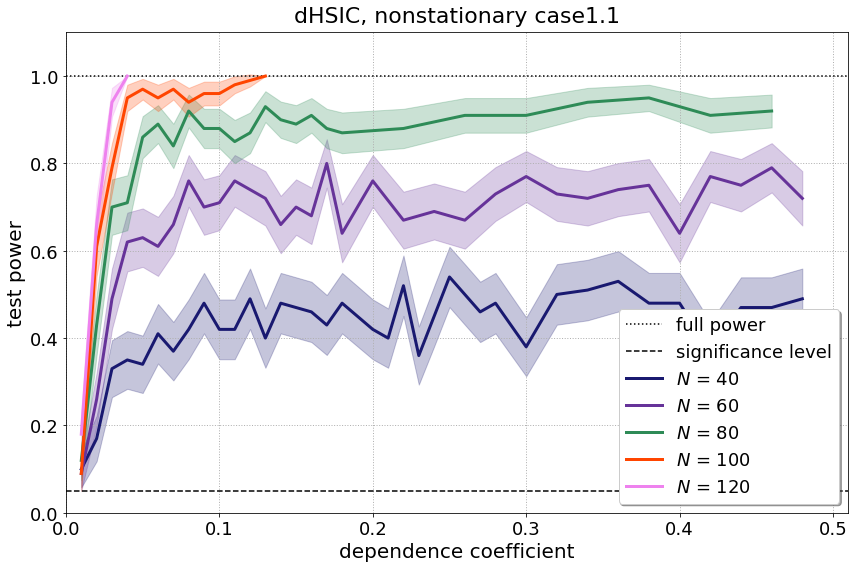

In [172]:
plt.figure(figsize=(12, 8))
plt.xlabel(r'dependence coefficient', size=20)
plt.ylabel(r'test power', size=20)
plt.ylim(0, 1.1)
plt.xlim(0.0, 0.51)
plt.hlines(y=1, xmin=0, xmax=1.1, colors='k', linestyles='dotted')
plt.hlines(y=0.05, xmin=0, xmax=1.1, colors='k', linestyles='dashed')

plt.title('dHSIC, nonstationary case1.1', size=22, pad=10)
plt.plot(x1, y1, 'midnightblue', lw=3) 
plt.plot(x2, y2, 'rebeccapurple', lw=3) 
plt.plot(x3, y3, 'seagreen', lw=3) 
plt.plot(x4, y4, 'orangered', lw=3) 
plt.plot(x5, y5, 'violet', lw=3)

# error bars
error_1 = confidence(y1)
error_2 = confidence(y2)
error_3 = confidence(y3)
error_4 = confidence(y4)
error_5 = confidence(y5)

plt.fill_between(x1, y1-error_1, y1+error_1, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x2, y2-error_2, y2+error_2, interpolate=True, alpha=0.25, color='rebeccapurple')
plt.fill_between(x3, y3-error_3, y3+error_3, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x4, y4-error_4, y4+error_4, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x5, y5-error_5, y5+error_5, interpolate=True, alpha=0.25, color='violet')

plt.legend(['full power','significance level', '$N$ = 40', '$N$ = 60', '$N$ = 80', '$N$ = 100', '$N$ = 120'], loc=0, fontsize=18, framealpha=1, shadow=True)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)
plt.tight_layout()
plt.savefig('svg/case11_n.svg', format='svg', dpi=300)
plt.show()

In [173]:
# case11_100n_30t_1000p = {'0.01': 0.32, '0.02': 0.83, '0.03': 0.82, '0.04': 0.94, '0.05': 0.95, '0.06': 1}
case11_100n_20t_1000p = {'0.01': 0.09, '0.02': 0.61, '0.03': 0.79, '0.04': 0.95, '0.05': 0.97, '0.06': 0.95, '0.07': 0.97, '0.08': 0.94, '0.09': 0.96, '0.1': 0.96, '0.11': 0.98, '0.12': 0.99, '0.13': 1}
case11_100n_10t_1000p = {'0.01': 0.04, '0.02': 0.1, '0.03': 0.19, '0.04': 0.39, '0.05': 0.62, '0.06': 0.65, '0.07': 0.83, '0.08': 0.85, '0.09': 0.96, '0.1': 0.91, '0.11': 0.96, '0.12': 0.98, '0.13': 1.0}
case11_100n_5t_1000p = {'0.01': 0.08, '0.03': 0.08, '0.05': 0.13, '0.07': 0.11, '0.09': 0.22, '0.11': 0.27, '0.13': 0.42, '0.15': 0.55, '0.17': 0.58, '0.19': 0.68, '0.21': 0.73, '0.23': 0.83, '0.25': 0.85, '0.27': 0.93, '0.29': 0.96, '0.31': 0.97, '0.33': 0.98, '0.35': 0.97, '0.37': 0.98, '0.39': 1}
case11_100n_3t_1000p = {'0.01': 0.05, '0.05': 0.07, '0.09': 0.05, '0.13': 0.15, '0.17': 0.1, '0.21': 0.19, '0.25': 0.17, '0.29': 0.32, '0.33': 0.47, '0.37': 0.64, '0.41': 0.66, '0.45': 0.75, '0.49': 0.85, '0.53': 0.91, '0.57': 0.95, '0.61':1}
case11_100n_1t_1000p = {'0.01': 0.08, '0.11': 0.01, '0.21': 0.07, '0.31': 0.01, '0.41': 0.07, '0.51': 0.05, '0.61': 0.07, '0.71': 0.05, '0.81': 0.07, '0.91': 0.02}

In [174]:
y5 = list(case11_100n_20t_1000p.values())
x5 = [float(x.strip(' "')) for x in list(case11_100n_20t_1000p.keys())]

y4 = list(case11_100n_10t_1000p.values())
x4 = [float(x.strip(' "')) for x in list(case11_100n_10t_1000p.keys())]

y3 = list(case11_100n_5t_1000p.values())
x3 = [float(x.strip(' "')) for x in list(case11_100n_5t_1000p.keys())]
      
y2 = list(case11_100n_3t_1000p.values())
x2 = [float(x.strip(' "')) for x in list(case11_100n_3t_1000p.keys())]

y1 = list(case11_100n_1t_1000p.values())
x1 = [float(x.strip(' "')) for x in list(case11_100n_1t_1000p.keys())]

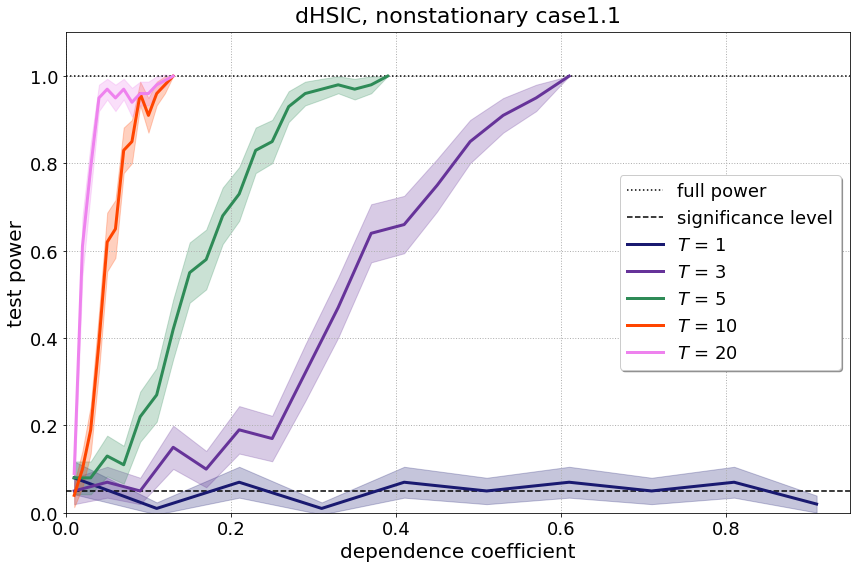

In [175]:
plt.figure(figsize=(12, 8))
plt.xlabel(r'dependence coefficient', size=20)
plt.ylabel(r'test power', size=20)
plt.ylim(0, 1.1)
plt.xlim(0.0, 0.95)
plt.hlines(y=1, xmin=0, xmax=1.1, colors='k', linestyles='dotted')
plt.hlines(y=0.05, xmin=0, xmax=1.1, colors='k', linestyles='dashed')

plt.title('dHSIC, nonstationary case1.1', size=22, pad=10)
plt.plot(x1, y1, 'midnightblue', lw=3) 
plt.plot(x2, y2, 'rebeccapurple', lw=3) 
plt.plot(x3, y3, 'seagreen', lw=3) 
plt.plot(x4, y4, 'orangered', lw=3) 
plt.plot(x5, y5, 'violet', lw=3)

# error bars
error_1 = confidence(y1)
error_2 = confidence(y2)
error_3 = confidence(y3)
error_4 = confidence(y4)
error_5 = confidence(y5)

plt.fill_between(x1, y1-error_1, y1+error_1, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x2, y2-error_2, y2+error_2, interpolate=True, alpha=0.25, color='rebeccapurple')
plt.fill_between(x3, y3-error_3, y3+error_3, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x4, y4-error_4, y4+error_4, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x5, y5-error_5, y5+error_5, interpolate=True, alpha=0.25, color='violet')

plt.legend(['full power','significance level',  '$T$ = 1', '$T$ = 3', '$T$ = 5', '$T$ = 10', '$T$ = 20'], loc=7, fontsize=18, framealpha=1, shadow=True)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)
plt.tight_layout()
plt.savefig('svg/case11_t.svg', format='svg', dpi=300)
plt.show()

In [19]:
case3_20n_20t_1000p = {'0.01': 0.04, '0.11': 0.04, '0.21': 0.07, '0.31': 0.04, '0.41': 0.06, '0.51': 0.04, '0.61': 0.05, '0.71': 0.03, '0.81': 0.03, '0.91': 0.05}
case3_50n_20t_1000p = {'0.01': 0.04, '0.11': 0.04, '0.21': 0.08, '0.31': 0.04, '0.41': 0.05, '0.51': 0.03, '0.61': 0.09, '0.71': 0.04, '0.81': 0.03, '0.91': 0.0}
case3_100n_20t_1000p = {'0.01': 0.03, '0.11': 0.07, '0.21': 0.03, '0.31': 0.06, '0.41': 0.04, '0.51': 0.03, '0.61': 0.05, '0.71': 0.05, '0.81': 0.04, '0.91': 0.06}
case3_100n_40t_1000p = {'0.01': 0.03, '0.11': 0.05, '0.21': 0.04, '0.31': 0.04, '0.41': 0.06, '0.51': 0.04, '0.61': 0.03, '0.71': 0.08, '0.81': 0.09, '0.91': 0.05}
case3_100n_80t_1000p = {'0.01': 0.04, '0.11': 0.07, '0.21': 0.02, '0.31': 0.04, '0.41': 0.04, '0.51': 0.05, '0.61': 0.04, '0.71': 0.06, '0.81': 0.05, '0.91': 0.05}

In [20]:
y5 = list(case3_100n_80t_1000p.values())
x5 = [float(x.strip(' "')) for x in list(case3_100n_80t_1000p.keys())]

y4 = list(case3_100n_40t_1000p.values())
x4 = [float(x.strip(' "')) for x in list(case3_100n_40t_1000p.keys())]

y3 = list(case3_100n_20t_1000p.values())
x3 = [float(x.strip(' "')) for x in list(case3_100n_20t_1000p.keys())]
      
y2 = list(case3_50n_20t_1000p.values())
x2 = [float(x.strip(' "')) for x in list(case3_50n_20t_1000p.keys())]

y1 = list(case3_20n_20t_1000p.values())
x1 = [float(x.strip(' "')) for x in list(case3_20n_20t_1000p.keys())]

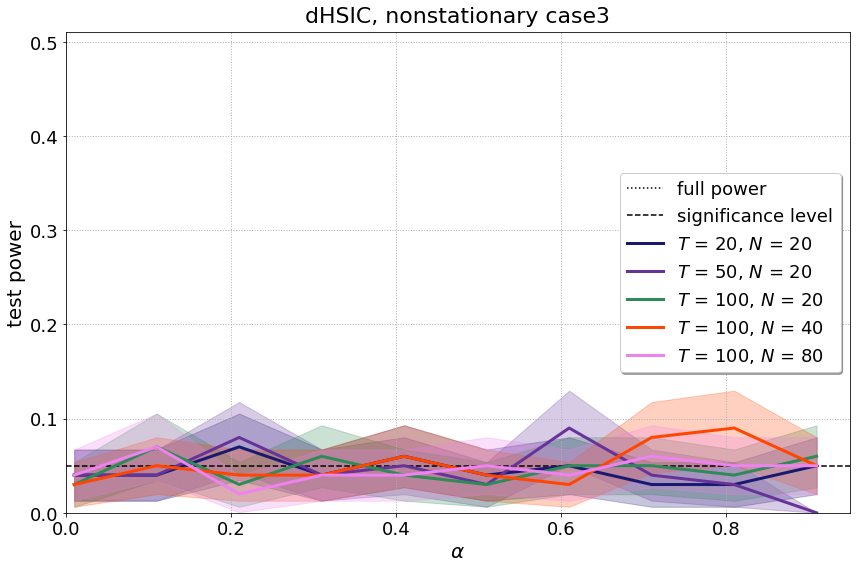

In [23]:
plt.figure(figsize=(12, 8))
plt.xlabel(r'$\alpha$', size=20)
plt.ylabel(r'test power', size=20)
plt.ylim(0, 0.51)
plt.xlim(0.0, 0.95)
plt.hlines(y=1, xmin=0, xmax=1.1, colors='k', linestyles='dotted')
plt.hlines(y=0.05, xmin=0, xmax=1.1, colors='k', linestyles='dashed')

plt.title('dHSIC, nonstationary case3', size=22, pad=10)
plt.plot(x1, y1, 'midnightblue', lw=3) 
plt.plot(x2, y2, 'rebeccapurple', lw=3) 
plt.plot(x3, y3, 'seagreen', lw=3) 
plt.plot(x4, y4, 'orangered', lw=3) 
plt.plot(x5, y5, 'violet', lw=3)

# error bars
error_1 = confidence(y1)
error_2 = confidence(y2)
error_3 = confidence(y3)
error_4 = confidence(y4)
error_5 = confidence(y5)

plt.fill_between(x1, y1-error_1, y1+error_1, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x2, y2-error_2, y2+error_2, interpolate=True, alpha=0.25, color='rebeccapurple')
plt.fill_between(x3, y3-error_3, y3+error_3, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x4, y4-error_4, y4+error_4, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x5, y5-error_5, y5+error_5, interpolate=True, alpha=0.25, color='violet')

plt.legend(['full power','significance level',  '$T$ = 20, $N$ = 20', '$T$ = 50, $N$ = 20', '$T$ = 100, $N$ = 20', '$T$ = 100, $N$ = 40', '$T$ = 100, $N$ = 80'], loc=7, fontsize=18, framealpha=1, shadow=True)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)
plt.tight_layout()
plt.savefig('svg/case3_tn.svg', format='svg', dpi=300)
plt.show()

In [79]:
# case2
case2_linear_100n_1t_1000p = {'0.01': 0.04, '0.11': 0.06, '0.21': 0.09, '0.31': 0.07, '0.41': 0.06, '0.51': 0.08, '0.611': 0.06, '0.71': 0.06, '0.81': 0.04, '0.91': 0.03}
case2_linear_100n_3t_1000p = {'0.010': 0.04, '0.025': 0.03, '0.040': 0.08, '0.055': 0.05, '0.070': 0.13, '0.085': 0.12, '0.100': 0.2, '0.115': 0.3, '0.130': 0.35, '0.145': 0.49,
                              '0.160': 0.53, '0.175': 0.7, '0.190': 0.78, '0.205': 0.9, '0.220': 0.94, '0.235': 0.92, '0.250': 0.97, '0.265': 0.99, '0.280': 1.0, '0.295': 0.98}
case2_linear_100n_5t_1000p = {'0.010': 0.05, '0.020': 0.07, '0.030': 0.09, '0.040': 0.13, '0.050': 0.17, '0.060': 0.26, '0.070': 0.35, '0.080': 0.35, '0.090': 0.53, '0.100': 0.61,
                              '0.110': 0.64, '0.120': 0.81, '0.130': 0.92, '0.140': 0.92, '0.150': 0.97, '0.160': 1.0, '0.170': 0.99, '0.180': 0.99, '0.190': 1.0}
case2_linear_100n_10t_1000p = {'0.010': 0.09, '0.015': 0.1, '0.020': 0.08, '0.025': 0.12, '0.030': 0.31, '0.035': 0.25, '0.040': 0.42, '0.045': 0.42, '0.050': 0.6, '0.055': 0.72,
                               '0.060': 0.82, '0.065': 0.83, '0.070': 0.91, '0.075': 0.95, '0.080': 0.98, '0.085': 1.0, '0.090': 1.0, '0.095': 1.0}
case2_linear_100n_20t_1000p = {'0.010': 0.14, '0.012': 0.16, '0.014': 0.2, '0.016': 0.19, '0.018': 0.36, '0.020': 0.45, '0.022': 0.41, '0.024': 0.52, '0.026': 0.66, '0.028': 0.7, 
                               '0.030': 0.84, '0.032': 0.84, '0.034': 0.88, '0.036': 0.91, '0.038': 0.95, '0.04': 0.98, '0.042': 0.99, '0.044': 1}

In [80]:
y5 = list(case2_linear_100n_20t_1000p.values())
x5 = [float(x.strip(' "')) for x in list(case2_linear_100n_20t_1000p.keys())]

y4 = list(case2_linear_100n_10t_1000p.values())
x4 = [float(x.strip(' "')) for x in list(case2_linear_100n_10t_1000p.keys())]

y3 = list(case2_linear_100n_5t_1000p.values())
x3 = [float(x.strip(' "')) for x in list(case2_linear_100n_5t_1000p.keys())]
      
y2 = list(case2_linear_100n_3t_1000p.values())
x2 = [float(x.strip(' "')) for x in list(case2_linear_100n_3t_1000p.keys())]

y1 = list(case2_linear_100n_1t_1000p.values())
x1 = [float(x.strip(' "')) for x in list(case2_linear_100n_1t_1000p.keys())]

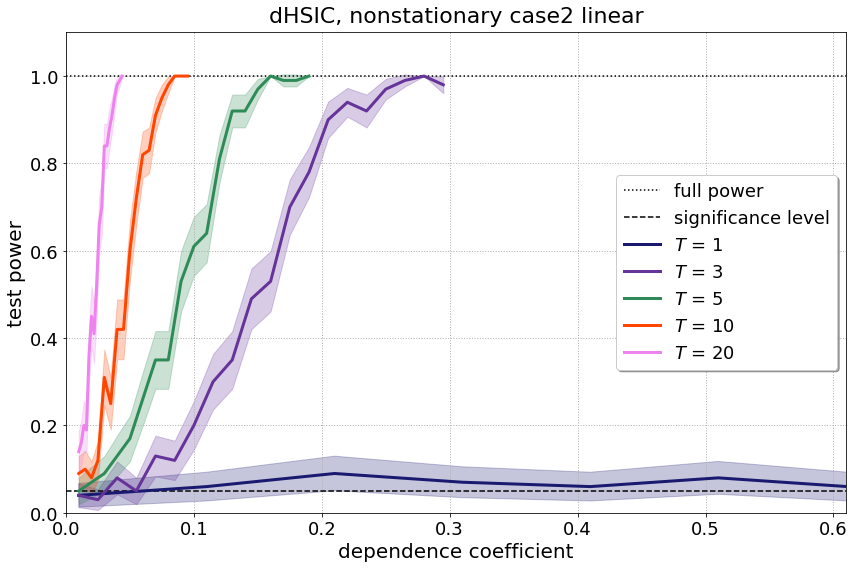

In [81]:
plt.figure(figsize=(12, 8))
plt.xlabel(r'dependence coefficient', size=20)
plt.ylabel(r'test power', size=20)
plt.ylim(0, 1.1)
plt.xlim(0.0, 0.61)
plt.hlines(y=1, xmin=0, xmax=1.1, colors='k', linestyles='dotted')
plt.hlines(y=0.05, xmin=0, xmax=1.1, colors='k', linestyles='dashed')

plt.title('dHSIC, nonstationary case2 linear', size=22, pad=10)
plt.plot(x1, y1, 'midnightblue', lw=3) 
plt.plot(x2, y2, 'rebeccapurple', lw=3) 
plt.plot(x3, y3, 'seagreen', lw=3) 
plt.plot(x4, y4, 'orangered', lw=3) 
plt.plot(x5, y5, 'violet', lw=3)

# error bars
error_1 = confidence(y1)
error_2 = confidence(y2)
error_3 = confidence(y3)
error_4 = confidence(y4)
error_5 = confidence(y5)

plt.fill_between(x1, y1-error_1, y1+error_1, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x2, y2-error_2, y2+error_2, interpolate=True, alpha=0.25, color='rebeccapurple')
plt.fill_between(x3, y3-error_3, y3+error_3, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x4, y4-error_4, y4+error_4, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x5, y5-error_5, y5+error_5, interpolate=True, alpha=0.25, color='violet')

plt.legend(['full power','significance level', '$T$ = 1', '$T$ = 3', '$T$ = 5', '$T$ = 10', '$T$ = 20'], loc=7, fontsize=18, framealpha=1, shadow=True)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)
plt.tight_layout()
plt.savefig('svg/nonstat_2_lin_time.svg', format='svg', dpi=300)

plt.show()

## case2.2

In [73]:
# case2.2
case22_100n_3t_1000p = {'0.010': 0.07, '0.025': 0.09, '0.040': 0.06, '0.055': 0.08, '0.070': 0.1, '0.085': 0.2, '0.100': 0.25, '0.115': 0.43, '0.130': 0.42, '0.145': 0.49, 
                        '0.160': 0.61, '0.175': 0.66, '0.190': 0.68, '0.205': 0.82, '0.220': 0.88, '0.235': 0.91, '0.250': 0.97, '0.265': 0.95, '0.280': 1.0, '0.295': 0.99} # t=3
case22_100n_5t_1000p = {'0.010': 0.05, '0.020': 0.08, '0.030': 0.13, '0.040': 0.09, '0.050': 0.24, '0.060': 0.19, '0.070': 0.31, '0.080': 0.47, '0.090': 0.59, '0.100': 0.65, 
                        '0.110': 0.7, '0.120': 0.86, '0.130': 0.89, '0.140': 0.96, '0.150': 0.97, '0.160': 0.98, '0.170': 0.97, '0.180': 1.0, '0.190': 1.0}
case22_100n_10t_1000p = {'0.01': 0.06, '0.014': 0.07, '0.018': 0.12, '0.022': 0.13,  '0.026': 0.15, '0.028': 0.27, 
                         '0.03': 0.3, '0.034': 0.3, '0.036': 0.3, '0.038': 0.43, '0.04': 0.41, '0.043': 0.47, '0.046': 0.59, '0.049': 0.57, '0.052': 0.61, 
                         '0.055': 0.66, '0.058': 0.69, '0.061': 0.85, '0.064': 0.94, '0.067': 0.87, '0.07': 0.94, '0.073': 0.9, '0.076': 0.97, '0.085': 0.99, '0.091': 1.0} #t=10
case22_100n_20t_1000p = {'0.010': 0.1, '0.011': 0.12, '0.013': 0.14, '0.014': 0.22, '0.016': 0.34, '0.017': 0.22, '0.019': 0.35, '0.020': 0.38, '0.022': 0.41, '0.023': 0.51, 
                         '0.025': 0.52, '0.026': 0.59, '0.028': 0.71, '0.029': 0.78, '0.031': 0.79, '0.032': 0.85, '0.034': 0.89, '0.035': 0.85, '0.037': 0.93, '0.038': 0.92, 
                         '0.040': 0.96, '0.041': 1.0} #t=20
case22_100n_1t_1000p = {'0.01': 0.04, '0.06': 0.02, '0.11': 0.03, '0.16': 0.09, '0.21': 0.04, '0.26': 0.08, '0.31': 0.09, '0.36': 0.03, '0.41': 0.01, '0.46': 0.04, '0.51': 0.03}

In [74]:
y5 = list(case22_100n_20t_1000p.values())
x5 = [float(x.strip(' "')) for x in list(case22_100n_20t_1000p.keys())]

y4 = list(case22_100n_10t_1000p.values())
x4 = [float(x.strip(' "')) for x in list(case22_100n_10t_1000p.keys())]

y3 = list(case22_100n_5t_1000p.values())
x3 = [float(x.strip(' "')) for x in list(case22_100n_5t_1000p.keys())]
      
y2 = list(case22_100n_3t_1000p.values())
x2 = [float(x.strip(' "')) for x in list(case22_100n_3t_1000p.keys())]

y1 = list(case22_100n_1t_1000p.values())
x1 = [float(x.strip(' "')) for x in list(case22_100n_1t_1000p.keys())]

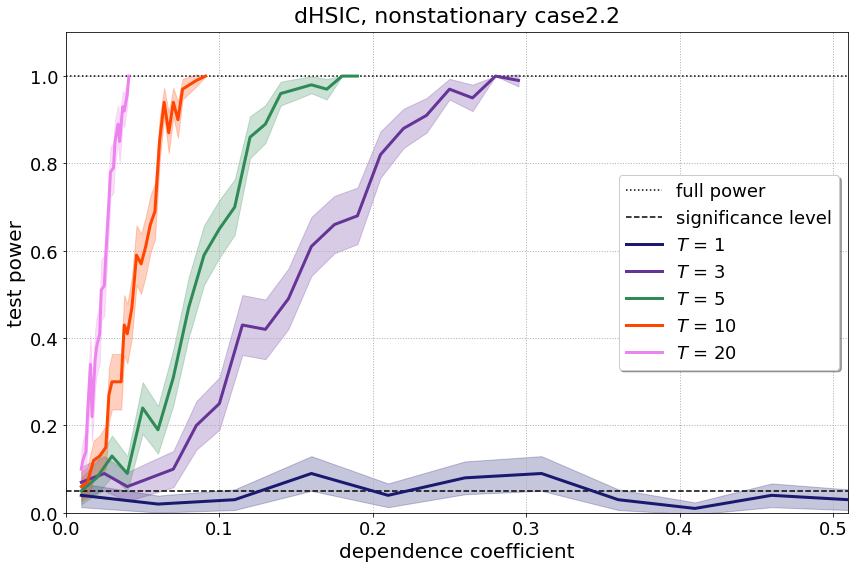

In [75]:
plt.figure(figsize=(12, 8))
plt.xlabel(r'dependence coefficient', size=20)
plt.ylabel(r'test power', size=20)
plt.ylim(0, 1.1)
plt.xlim(0.0, 0.51)
plt.hlines(y=1, xmin=0, xmax=1.1, colors='k', linestyles='dotted')
plt.hlines(y=0.05, xmin=0, xmax=1.1, colors='k', linestyles='dashed')

plt.title('dHSIC, nonstationary case2.2', size=22, pad=10)
plt.plot(x1, y1, 'midnightblue', lw=3) 
plt.plot(x2, y2, 'rebeccapurple', lw=3) 
plt.plot(x3, y3, 'seagreen', lw=3) 
plt.plot(x4, y4, 'orangered', lw=3) 
plt.plot(x5, y5, 'violet', lw=3)

# error bars
error_1 = confidence(y1)
error_2 = confidence(y2)
error_3 = confidence(y3)
error_4 = confidence(y4)
error_5 = confidence(y5)

plt.fill_between(x1, y1-error_1, y1+error_1, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x2, y2-error_2, y2+error_2, interpolate=True, alpha=0.25, color='rebeccapurple')
plt.fill_between(x3, y3-error_3, y3+error_3, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x4, y4-error_4, y4+error_4, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x5, y5-error_5, y5+error_5, interpolate=True, alpha=0.25, color='violet')

plt.legend(['full power','significance level', '$T$ = 1', '$T$ = 3', '$T$ = 5', '$T$ = 10', '$T$ = 20'], loc=7, fontsize=18, framealpha=1, shadow=True)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)
plt.tight_layout()
plt.savefig('svg/case22_t.svg', format='svg', dpi=300)
plt.show()

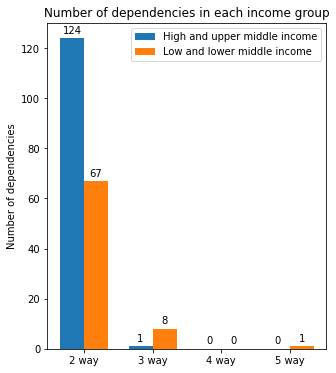

In [249]:
X = ['2 way','3 way','4 way','5 way']
rich = [124,1,0,0]
poor = [67,8,0,1]
  
X_axis = np.arange(len(X))
width = 0.35
fig, ax = plt.subplots()
fig.set_size_inches(5, 6)
rects1 = ax.bar(X_axis - width/2, rich, width, label='High and upper middle income')
rects2 = ax.bar(X_axis + width/2, poor, width, label='Low and lower middle income')

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

plt.xticks(X_axis, X)
plt.ylabel("Number of dependencies")
plt.title("Number of dependencies in each income group")
plt.legend()

plt.savefig('svg/income.svg', format='svg', dpi=300)
plt.show()

<Figure size 1500x900 with 0 Axes>

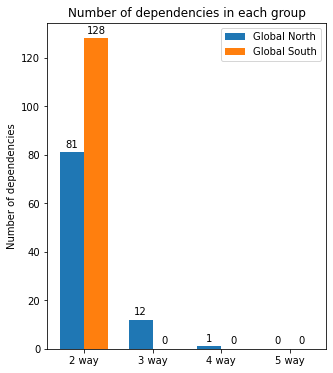

In [250]:
plt.figure(figsize=(5, 3), dpi=300)

X = ['2 way','3 way','4 way','5 way']
rich = [81,12,1,0]
poor = [128,0,0,0]
  
X_axis = np.arange(len(X))

X_axis = np.arange(len(X))
width = 0.35
fig, ax = plt.subplots()
fig.set_size_inches(5, 6)
rects1 = ax.bar(X_axis - width/2, rich, width, label='Global North')
rects2 = ax.bar(X_axis + width/2, poor, width, label='Global South')

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
  
plt.xticks(X_axis, X)
plt.ylabel("Number of dependencies")
plt.title("Number of dependencies in each group")
plt.legend()

plt.savefig('svg/geography.svg', format='svg', dpi=300)
plt.show()

In [281]:
freq_mix = {1: ('v1', 'v2', 'v3'),
           2: ('v1', 'v2', 'v4'),
           3: ('v1', 'v4', 'v3'),
           4: ('v4', 'v2', 'v3')}

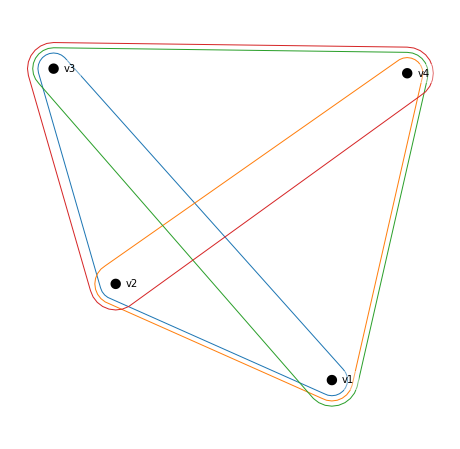

In [282]:
H_gn = hnx.Hypergraph(freq_mix)
H_gn_restrict_edges4 = H_gn.restrict_to_edges(list(e for e in freq_mix if len(freq_mix[e])==3))
hnx.draw(H_gn_restrict_edges4, pos=nx.spring_layout(H_gn_restrict_edges4), with_edge_labels=False)
plt.savefig('svg/freq_mix.svg', format='svg', dpi=300)